# Import Libraries and Load Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from mpl_toolkits.basemap import Basemap
import folium
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

%matplotlib inline
sns.set_color_codes("pastel")

In [2]:
#Import all data
flights_df = pd.read_csv('2008.csv')
airports_df = pd.read_csv('airports.csv')
carriers_df = pd.read_csv('carriers.csv')
cancel_reason = ['Carrier','Weather','NAS','Security']

#Change case of column names
flights_df.columns = [column.lower() for column in flights_df.columns]

#Add extra column with the route
flights_df['route'] = flights_df.origin + flights_df.dest

#Backup main data
df = flights_df.copy()

#Create helper dictionaries
airport_dict = dict(zip(airports_df.iata,airports_df.airport))

#Small adjustment needed for the carrier table 
carriers_df.at[1308,'Description'] = 'US Airways'
carrier_dict = dict(zip(carriers_df.Code,carriers_df.Description))

In [207]:
flights_df.head(3)

month  dayofmonth  dayofweek   deptime crsdeptime   arrtime crsarrtime  \
0      1           3          4  20:03:00   19:55:00  22:11:00   22:25:00   
1      1           3          4  07:54:00   07:35:00  10:02:00   10:00:00   
2      1           3          4  06:28:00   06:20:00  08:04:00   07:50:00   

  uniquecarrier  flightnum  airtime  ...  dest  distance cancelled  \
0            WN        335      116  ...   TPA       810     False   
1            WN       3231      113  ...   TPA       810     False   
2            WN        448       76  ...   BWI       515     False   

  cancellationcode  carrierdelay  weatherdelay nasdelay  securitydelay  \
0              NaN             0             0        0              0   
1              NaN             0             0        0              0   
2              NaN             0             0        0              0   

   lateaircraftdelay   route  
0                  0  IADTPA  
1                  0  IADTPA  
2                  0  INDBWI  

[3 rows x 23 columns]

In [5]:
df.columns

Index(['year', 'month', 'dayofmonth', 'dayofweek', 'deptime', 'crsdeptime',
       'arrtime', 'crsarrtime', 'uniquecarrier', 'flightnum', 'tailnum',
       'actualelapsedtime', 'crselapsedtime', 'airtime', 'arrdelay',
       'depdelay', 'origin', 'dest', 'distance', 'taxiin', 'taxiout',
       'cancelled', 'cancellationcode', 'diverted', 'carrierdelay',
       'weatherdelay', 'nasdelay', 'securitydelay', 'lateaircraftdelay'],
      dtype='object')

# Data Statistics

In [5]:
df.shape

(7009728, 29)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 29 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               float64
TaxiOut              float64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtypes: float64(14), int64(10), object(5)
memory usage: 1.5+ GB


In [8]:
df.describe()

Year         Month    DayofMonth     DayOfWeek       DepTime  \
count  7009728.0  7.009728e+06  7.009728e+06  7.009728e+06  6.873482e+06   
mean      2008.0  6.375130e+00  1.572801e+01  3.924182e+00  1.333830e+03   
std          0.0  3.406737e+00  8.797068e+00  1.988259e+00  4.780689e+02   
min       2008.0  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
25%       2008.0  3.000000e+00  8.000000e+00  2.000000e+00  9.280000e+02   
50%       2008.0  6.000000e+00  1.600000e+01  4.000000e+00  1.325000e+03   
75%       2008.0  9.000000e+00  2.300000e+01  6.000000e+00  1.728000e+03   
max       2008.0  1.200000e+01  3.100000e+01  7.000000e+00  2.400000e+03   

         CRSDepTime       ArrTime    CRSArrTime     FlightNum  \
count  7.009728e+06  6.858079e+06  7.009728e+06  7.009728e+06   
mean   1.326086e+03  1.481258e+03  1.494801e+03  2.224200e+03   
std    4.642509e+02  5.052251e+02  4.826728e+02  1.961716e+03   
min    0.000000e+00  1.000000e+00  0.000000e+00  1.000000e+00   
25%    9.250000e+02  1.107000e+03  1.115000e+03  6.220000e+02   
50%    1.320000e+03  1.512000e+03  1.517000e+03  1.571000e+03   
75%    1.715000e+03  1.909000e+03  1.907000e+03  3.518000e+03   
max    2.359000e+03  2.400000e+03  2.400000e+03  9.743000e+03   

       ActualElapsedTime  ...      Distance        TaxiIn       TaxiOut  \
count       6.855029e+06  ...  7.009728e+06  6.858079e+06  6.872670e+06   
mean        1.273224e+02  ...  7.263870e+02  6.860852e+00  1.645305e+01   
std         7.018731e+01  ...  5.621018e+02  4.933649e+00  1.133280e+01   
min         1.200000e+01  ...  1.100000e+01  0.000000e+00  0.000000e+00   
25%         7.700000e+01  ...  3.250000e+02  4.000000e+00  1.000000e+01   
50%         1.100000e+02  ...  5.810000e+02  6.000000e+00  1.400000e+01   
75%         1.570000e+02  ...  9.540000e+02  8.000000e+00  1.900000e+01   
max         1.379000e+03  ...  4.962000e+03  3.080000e+02  4.290000e+02   

          Cancelled      Diverted  CarrierDelay  WeatherDelay      NASDelay  \
count  7.009728e+06  7.009728e+06  1.524735e+06  1.524735e+06  1.524735e+06   
mean   1.960618e-02  2.463006e-03  1.577206e+01  3.039031e+00  1.716462e+01   
std    1.386426e-01  4.956753e-02  4.009912e+01  1.950287e+01  3.189495e+01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  6.000000e+00   
75%    0.000000e+00  0.000000e+00  1.600000e+01  0.000000e+00  2.100000e+01   
max    1.000000e+00  1.000000e+00  2.436000e+03  1.352000e+03  1.357000e+03   

       SecurityDelay  LateAircraftDelay  
count   1.524735e+06       1.524735e+06  
mean    7.497434e-02       2.077098e+01  
std     1.837940e+00       3.925964e+01  
min     0.000000e+00       0.000000e+00  
25%     0.000000e+00       0.000000e+00  
50%     0.000000e+00       0.000000e+00  
75%     0.000000e+00       2.600000e+01  
max     3.920000e+02       1.316000e+03  

[8 rows x 24 columns]

In [11]:
df.nunique()

Year                    1
Month                  12
DayofMonth             31
DayOfWeek               7
DepTime              1440
CRSDepTime           1217
ArrTime              1440
CRSArrTime           1378
UniqueCarrier          20
FlightNum            7539
TailNum              5373
ActualElapsedTime     689
CRSElapsedTime        525
AirTime               663
ArrDelay             1153
DepDelay             1134
Origin                303
Dest                  304
Distance             1435
TaxiIn                190
TaxiOut               342
Cancelled               2
CancellationCode        4
Diverted                2
CarrierDelay          984
WeatherDelay          599
NASDelay              574
SecurityDelay         156
LateAircraftDelay     564
dtype: int64

## Null Values

In [35]:
df.isna().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime               136246
CRSDepTime                 0
ArrTime               151649
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                83365
ActualElapsedTime     154699
CRSElapsedTime           844
AirTime               154699
ArrDelay              154699
DepDelay              136246
Origin                     0
Dest                       0
Distance                   0
TaxiIn                151649
TaxiOut               137058
Cancelled                  0
CancellationCode     6872294
Diverted                   0
CarrierDelay         5484993
WeatherDelay         5484993
NASDelay             5484993
SecurityDelay        5484993
LateAircraftDelay    5484993
dtype: int64

In [53]:
#Confirm that missing time data (arrival/departure) is due to cancelled/diverted planes
df[(df.Cancelled==False) & (df.Diverted==False)].isna().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime                    0
CRSDepTime                 0
ArrTime                    0
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                    5
ActualElapsedTime          0
CRSElapsedTime             0
AirTime                    0
ArrDelay                   0
DepDelay                   0
Origin                     0
Dest                       0
Distance                   0
TaxiIn                     0
TaxiOut                    0
Cancelled                  0
CancellationCode     6855029
Diverted                   0
CarrierDelay         5330294
WeatherDelay         5330294
NASDelay             5330294
SecurityDelay        5330294
LateAircraftDelay    5330294
dtype: int64

## Issues to fix

<ul>
  <li>Change type of columns expressed in hours/minutes time object</li>
  <li>Change type of columns expressed in minutes to int</li>
  <li>Replace NaN values for time columns with 0</li>
  <li>Change type of cancelled,diverted columns to boolean</li>
  <li>Change cancellation code, unique carrier to categorical</li>
  <li>Drop Taxi Time related data</li>  
</ul>

# Data Wrangling 

## Drop unused data

### Fix

In [3]:
drop_columns = ['taxiin','taxiout','year','diverted','tailnum','actualelapsedtime','crselapsedtime']
df.drop(columns=drop_columns,inplace=True)

### Test

In [7]:
df.columns

Index(['month', 'dayofmonth', 'dayofweek', 'deptime', 'crsdeptime', 'arrtime',
       'crsarrtime', 'uniquecarrier', 'flightnum', 'airtime', 'arrdelay',
       'depdelay', 'origin', 'dest', 'distance', 'cancelled',
       'cancellationcode', 'carrierdelay', 'weatherdelay', 'nasdelay',
       'securitydelay', 'lateaircraftdelay'],
      dtype='object')

## Categorical variables

### Fix

In [4]:
df[['cancellationcode','uniquecarrier']] = df[['cancellationcode','uniquecarrier']].astype('category')

### Test

In [14]:
df.CancellationCode.unique()

[NaN, A, C, B, D]
Categories (4, object): [A, C, B, D]

In [14]:
df.uniquecarrier.unique()

[WN, XE, YV, OH, OO, ..., AA, AQ, AS, B6, CO]
Length: 20
Categories (20, object): [WN, XE, YV, OH, ..., AQ, AS, B6, CO]

## Boolean variables

### Fix

In [5]:
df[['cancelled']] = df[['cancelled']].astype('bool')

### Test

In [21]:
df.Cancelled.dtype

dtype('bool')

## Null Values

### Fix

In [6]:
time_columns = df.columns[(df.columns.str.contains('time'))|(df.columns.str.contains('delay'))]
print(time_columns)
df[time_columns] = df[time_columns].fillna(0)

Index(['deptime', 'crsdeptime', 'arrtime', 'crsarrtime', 'airtime', 'arrdelay',
       'depdelay', 'carrierdelay', 'weatherdelay', 'nasdelay', 'securitydelay',
       'lateaircraftdelay'],
      dtype='object')


### Test

In [65]:
df.isna().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime                    0
CRSDepTime                 0
ArrTime                    0
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                83365
ActualElapsedTime          0
CRSElapsedTime             0
AirTime                    0
ArrDelay                   0
DepDelay                   0
Origin                     0
Dest                       0
Distance                   0
Cancelled                  0
CancellationCode     6872294
Diverted                   0
CarrierDelay               0
WeatherDelay               0
NASDelay                   0
SecurityDelay              0
LateAircraftDelay          0
dtype: int64

## Time variables

### Fix

In [7]:
#Make all columns integers
df[time_columns] = df[time_columns].astype(int)

In [8]:
#select the columns in HH:MM format
time_columns = time_columns[:4]
time_columns 

Index(['deptime', 'crsdeptime', 'arrtime', 'crsarrtime'], dtype='object')

In [9]:
#In order to convert column to type ensure all hours are between 0 and 23 and all minutes are between 0 and 59
#Do this for all columns
for column in time_columns:
    print(df[df[column] > 2359][column].unique())
    print(df[df[column] % 100 > 59][column].unique())

[2400]
[]
[]
[]
[2400]
[]
[2400]
[]


In [10]:
#Replace the values and convert
for column in time_columns:
    df[column].replace(2400,0,inplace=True)
    df[column] = df[column].apply(lambda x: datetime.time(int(x/100), x%100))

### Test

In [12]:
df[time_columns].dtypes

deptime       object
crsdeptime    object
arrtime       object
crsarrtime    object
dtype: object

In [13]:
df[time_columns].head(10)

deptime crsdeptime   arrtime crsarrtime
0  20:03:00   19:55:00  22:11:00   22:25:00
1  07:54:00   07:35:00  10:02:00   10:00:00
2  06:28:00   06:20:00  08:04:00   07:50:00
3  09:26:00   09:30:00  10:54:00   11:00:00
4  18:29:00   17:55:00  19:59:00   19:25:00
5  19:40:00   19:15:00  21:21:00   21:10:00
6  19:37:00   18:30:00  20:37:00   19:40:00
7  10:39:00   10:40:00  11:32:00   11:50:00
8  06:17:00   06:15:00  06:52:00   06:50:00
9  16:20:00   16:20:00  16:39:00   16:55:00

In [11]:
flights_df = df.copy()
#df.to_csv('flights_clean.csv')

## Carrier Dictionary

### Fix 

In [39]:
carriers_df[carriers_df.Code=='US']

Code                                        Description
1308   US  US Airways Inc. (Merged with America West 9/05...

In [40]:
carriers_df.at[1308,'Description'] = 'US Airways'

### Test

In [41]:
carriers_df[carriers_df.Code=='US']

Code Description
1308   US  US Airways

### Convert to Dictionary

In [42]:
carrier_dict = dict(zip(carriers_df.Code,carriers_df.Description))

# Exploratory Analysis

In [15]:
df.head(3)

Year  Month  DayofMonth  DayOfWeek   DepTime CRSDepTime   ArrTime  \
0  2008      1           3          4  20:03:00   19:55:00  22:11:00   
1  2008      1           3          4  07:54:00   07:35:00  10:02:00   
2  2008      1           3          4  06:28:00   06:20:00  08:04:00   

  CRSArrTime UniqueCarrier  FlightNum  ... Dest  Distance  Cancelled  \
0   22:25:00            WN        335  ...  TPA       810      False   
1   10:00:00            WN       3231  ...  TPA       810      False   
2   07:50:00            WN        448  ...  BWI       515      False   

   CancellationCode  Diverted  CarrierDelay WeatherDelay NASDelay  \
0               NaN     False             0            0        0   
1               NaN     False             0            0        0   
2               NaN     False             0            0        0   

   SecurityDelay  LateAircraftDelay  
0              0                  0  
1              0                  0  
2              0                  0  

[3 rows x 27 columns]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 27 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              object
CRSDepTime           object
ArrTime              object
CRSArrTime           object
UniqueCarrier        category
FlightNum            int64
TailNum              object
ActualElapsedTime    int32
CRSElapsedTime       int32
AirTime              int32
ArrDelay             int32
DepDelay             int32
Origin               object
Dest                 object
Distance             int64
Cancelled            bool
CancellationCode     category
Diverted             bool
CarrierDelay         int32
WeatherDelay         int32
NASDelay             int32
SecurityDelay        int32
LateAircraftDelay    int32
dtypes: bool(2), category(2), int32(10), int64(6), object(7)
memory usage: 989.4+ MB


In [18]:
df.Origin.nunique()

303

In [19]:
df.Dest.nunique()

304

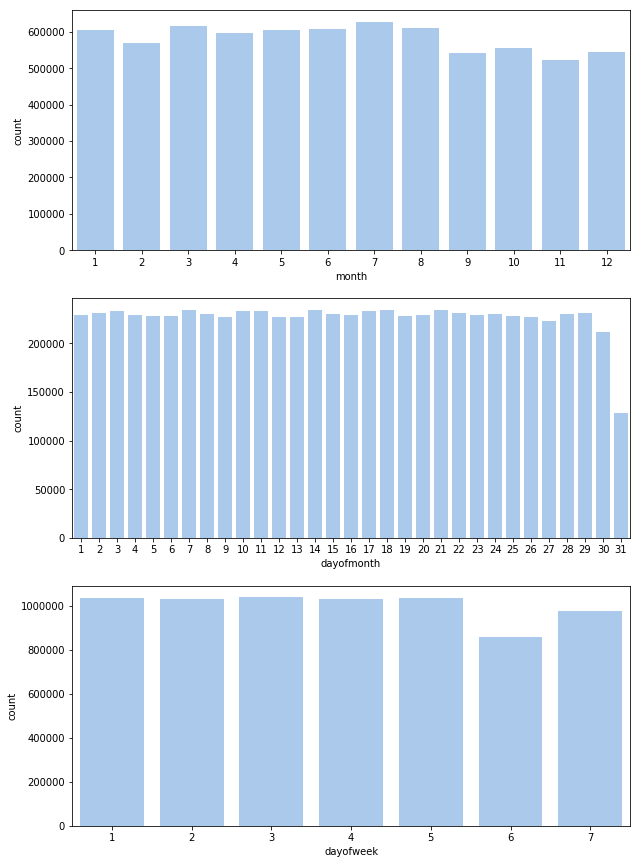

In [12]:
#Check distribution of flights per Day of week/month and month
#Expectation is that the values are aproximately close (with the exception of the 31st day of the month)
#Any major deviation will be investigated
variables = ['month','dayofmonth','dayofweek']
fig,axes = plt.subplots(ncols = 1, nrows = 3, figsize = (10,15))
for variable,ax in zip(variables,axes):
    sns.countplot(data = df, x = variable,color = 'b', ax = ax);

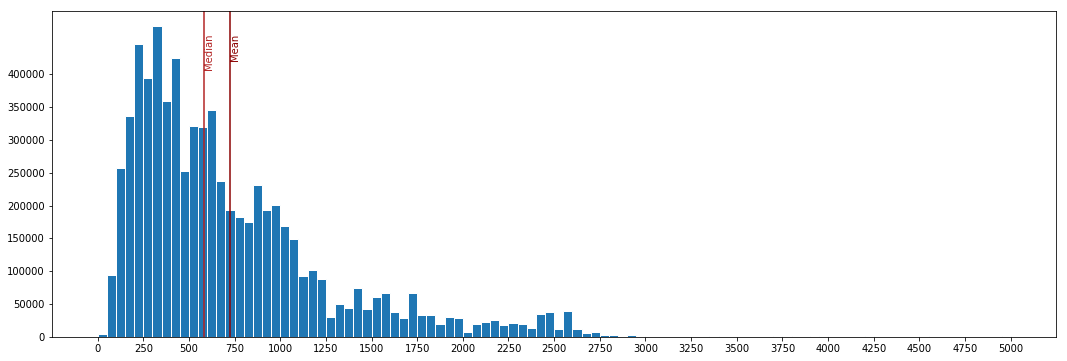

In [13]:
bin_size = 50
bins = np.arange(0,df.distance.max()+bin_size,bin_size)
fig,ax = plt.subplots(figsize=(18,6))
plt.xticks(bins[::5])
plt.yticks(np.arange(0,450000,50000))
plt.axvline(x=df.distance.median(),color = '#B22222')
plt.text(df.distance.median(),450000,'Median',rotation='vertical',color='#B22222')
plt.axvline(x=df.distance.mean(),color = '#8B0000')
plt.text(df.distance.mean(),450000,'Mean',rotation='vertical',color='#8B0000')
plt.hist(data=df, x = 'distance',bins = bins,edgecolor = 'w');

In [22]:
df.distance.describe()[-5:]

min      11.0
25%     325.0
50%     581.0
75%     954.0
max    4962.0
Name: distance, dtype: float64

In [23]:
df[df.distance < 100][['origin','dest']]

origin dest
94778      SAN  ONT
96148      SAT  AUS
97290      ONT  SAN
97321      ONT  SAN
102740     BPT  IAH
102861     DTW  CLE
102980     DTW  CLE
103018     IAH  BPT
103417     IAH  BPT
103441     BPT  IAH
103473     DTW  CLE
103634     DTW  CLE
103697     IAH  BPT
103863     IAH  BPT
103954     IAH  CLL
104025     CLL  IAH
104441     BPT  IAH
104655     BPT  IAH
104722     DTW  CLE
104799     CLL  IAH
104868     IAH  BPT
105201     CLE  DTW
105324     IAH  BPT
105434     IAH  BPT
105650     BPT  IAH
105813     IAH  BPT
105888     CLL  IAH
105987     IAH  BPT
106093     IAH  CLL
106170     CLL  IAH
...        ...  ...
6953095    JNU  SIT
6953181    SIT  JNU
6953184    JNU  SIT
6953294    KTN  WRG
6953301    SIT  JNU
6953318    WRG  PSG
6953449    JNU  SIT
6953470    PSG  WRG
6953471    WRG  KTN
6953481    WRG  PSG
6953579    KTN  WRG
6953621    JNU  SIT
6953792    SIT  JNU
6953803    SIT  JNU
6953845    JNU  SIT
6953849    WRG  KTN
6953850    PSG  WRG
6953935    SIT  JNU
6953988    SIT  JNU
6954162    WRG  KTN
6954177    WRG  PSG
6954178    JNU  SIT
6954188    PSG  WRG
6954195    JNU  SIT
6954196    KTN  WRG
6954292    WRG  PSG
6954363    KTN  WRG
6954365    SIT  JNU
6954389    SIT  JNU
6954540    JNU  SIT

[98246 rows x 2 columns]

## Cancellations

Objectives:
- cancellation per carrier and reason
- cancellation and distance
- cancellation and origin/weather
- cancellation per time intervals

In [230]:
dfcancel = flights_df.copy()
dfcancel.drop(columns=['arrtime','crsarrtime','airtime', 'arrdelay',
       'depdelay','carrierdelay', 'weatherdelay', 'nasdelay',
       'securitydelay', 'lateaircraftdelay'],inplace=True)
dfcancel.head(3)

month  dayofmonth  dayofweek   deptime crsdeptime uniquecarrier  flightnum  \
0      1           3          4  20:03:00   19:55:00            WN        335   
1      1           3          4  07:54:00   07:35:00            WN       3231   
2      1           3          4  06:28:00   06:20:00            WN        448   

  origin dest  distance  cancelled cancellationcode   route  
0    IAD  TPA       810      False              NaN  IADTPA  
1    IAD  TPA       810      False              NaN  IADTPA  
2    IND  BWI       515      False              NaN  INDBWI

### Carriers with the highest percentage of cancellations

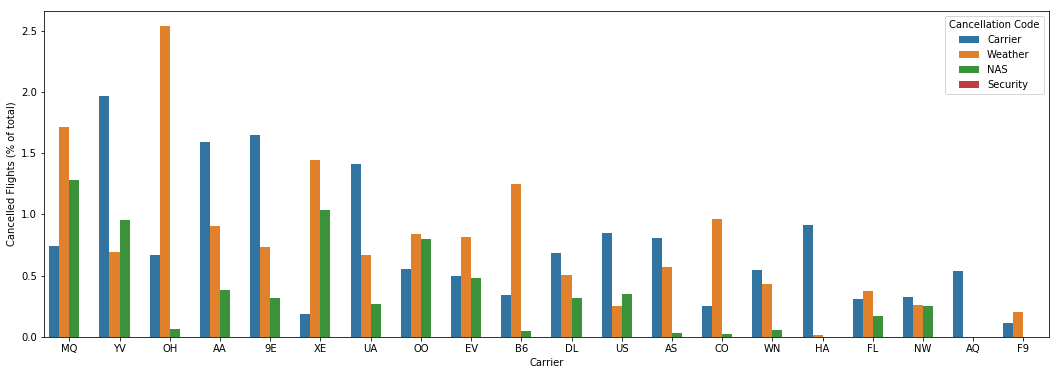

In [231]:
#Get number of cancelled flights per carrier
carr_cancel = dfcancel.groupby(['uniquecarrier','cancellationcode']).cancelled.sum().reset_index()

#Get number of flights per carrier
carr_flights = dfcancel.groupby('uniquecarrier').flightnum.count().reset_index()

#Left join the results to compute the cancellation rates
df_cancel = pd.merge(carr_cancel,carr_flights,on='uniquecarrier',how = 'left')
df_cancel['cancelrate'] = df_cancel.cancelled / df_cancel.flightnum * 100

#Determine the order in which to show the carriers in the graph
carrier_order = df_cancel.groupby('uniquecarrier').cancelrate.sum().sort_values(ascending=False).index.values

#Draw the barplot 
fig, ax = plt.subplots(figsize=(18,6))
sns.barplot(data = df_cancel, x = 'uniquecarrier', y = 'cancelrate', hue = 'cancellationcode', order = carrier_order, ax = ax)
#workaround to show the legend with colors otherwise it's all black
h, l = ax.get_legend_handles_labels()
ax.legend(h, cancel_reason, title = 'Cancellation Code', loc = 'upper right')
plt.ylabel('Cancelled Flights (% of total)')
plt.xlabel('Carrier');

### Carriers with highest rate of cancellation due their own fault

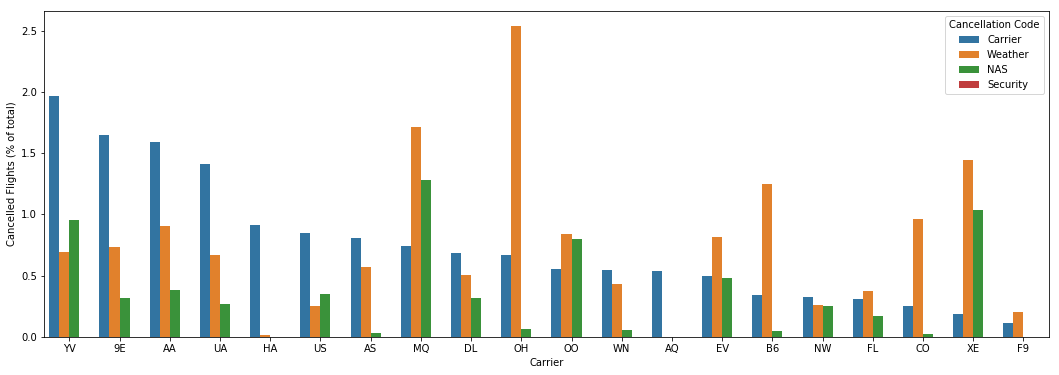

In [232]:
#Determine the order in which to show the carriers in the graph
carrier_order = df_cancel[df_cancel['cancellationcode']=='A'].groupby('uniquecarrier').cancelrate.sum().sort_values(ascending=False).index.values

#Draw the barplot 
fig, ax = plt.subplots(figsize=(18,6))
sns.barplot(data = df_cancel, x = 'uniquecarrier', y = 'cancelrate', hue = 'cancellationcode', order = carrier_order, ax = ax)
#workaround to show the legend with colors otherwise it's all black
h, l = ax.get_legend_handles_labels()
ax.legend(h, cancel_reason, title = 'Cancellation Code', loc = 'upper right')
plt.ylabel('Cancelled Flights (% of total)')
plt.xlabel('Carrier');

### Carriers with highest number of cancellation due their own fault

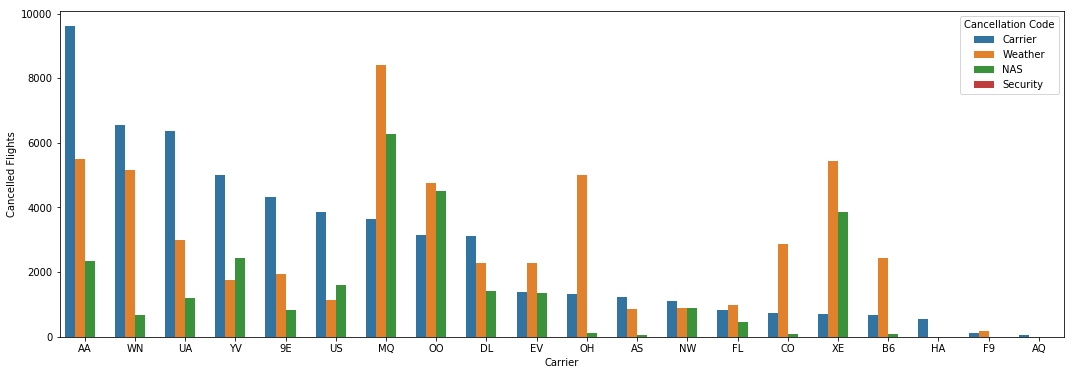

In [233]:
#Determine the order in which to show the carriers in the graph
carrier_order = df_cancel[df_cancel['cancellationcode']=='A'].groupby('uniquecarrier').cancelled.sum().sort_values(ascending=False).index.values

#Draw the barplot 
fig, ax = plt.subplots(figsize=(18,6))
sns.barplot(data = df_cancel, x = 'uniquecarrier', y = 'cancelled', hue = 'cancellationcode', order = carrier_order, ax = ax)
#workaround to show the legend with colors otherwise it's all black
h, l = ax.get_legend_handles_labels()
ax.legend(h, cancel_reason, title = 'Cancellation Code', loc = 'upper right')
plt.ylabel('Cancelled Flights')
plt.xlabel('Carrier');

### Distance correlation

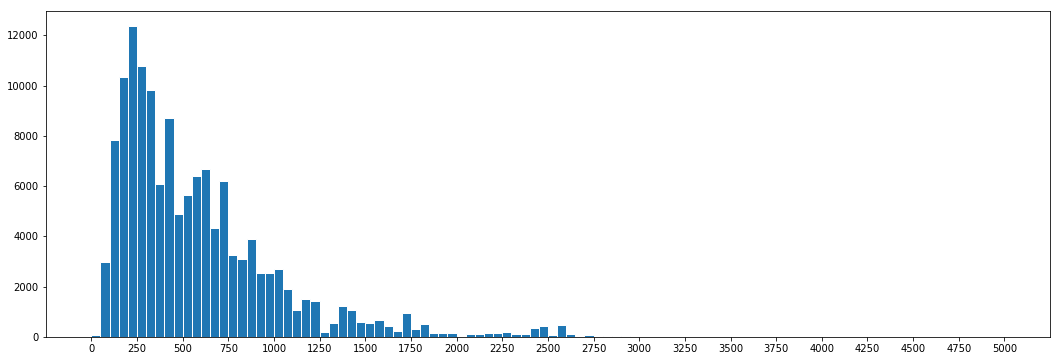

In [234]:
bin_size = 50
bins = np.arange(0,dfcancel.distance.max()+bin_size,bin_size)
fig,axes = plt.subplots(figsize=(18,6))
plt.xticks(bins[::5])
plt.hist(data=dfcancel[dfcancel.cancelled], x = 'distance',bins = bins,edgecolor = 'w');

In [235]:
dfcancel['distance_bin'] = pd.cut(dfcancel.distance,bins)

In [236]:
total_flights = dfcancel.groupby('distance_bin').flightnum.count().values
cancelled_flights = dfcancel[dfcancel.cancelled].groupby('distance_bin').flightnum.count().values

<BarContainer object of 100 artists>

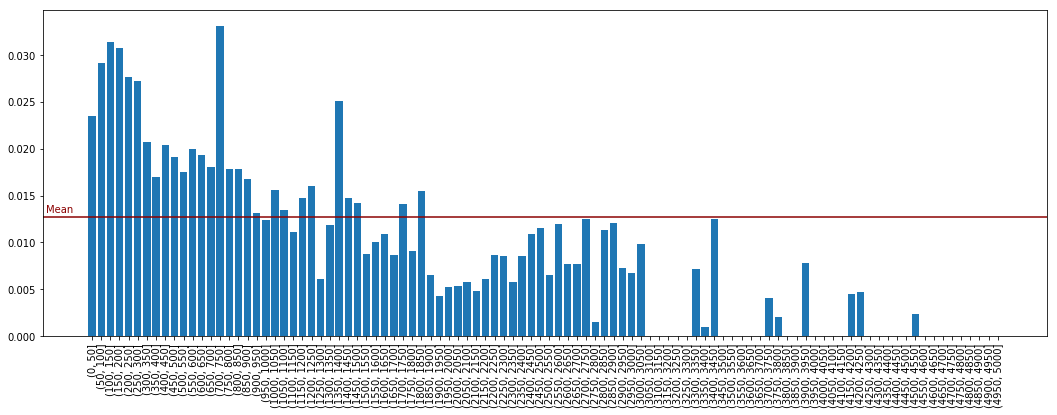

In [237]:
cancel_ratios = []
for i,j in zip(total_flights,cancelled_flights):
    if i==0:
        cancel_ratios.append(0)
    else:
        cancel_ratios.append(j/i)

fig,axes = plt.subplots(figsize=(18,6))
plt.xticks(rotation='vertical')
plt.axhline(y=np.average([n for n in cancel_ratios if n>0]),color = '#8B0000')
plt.text(-5,np.average([n for n in cancel_ratios if n>0])+0.0005,'Mean',rotation='horizontal',color='#8B0000')
plt.bar([str(x) for x in dfcancel.groupby('distance_bin').flightnum.count().index],cancel_ratios)

### Airports with the highest rate of cancellations

In [238]:
df_cancel_origin = pd.concat(
    [df[df.cancellationcode == 'B'].groupby(['origin']).origin.count(),
     df.groupby(['origin']).origin.count()],
    axis = 1, sort = True)
df_cancel_origin.columns = ['cancellations','total']
df_cancel_origin.cancellations.fillna(0)
df_cancel_origin['cancelrate'] = df_cancel_origin.cancellations / df_cancel_origin.total * 100
df_cancel_origin.sort_values(by='cancellations',ascending=False,inplace=True)
df_cancel_origin.reset_index(inplace=True)
df_cancel_origin.rename(index=str, columns={'index':'iata'},inplace=True)
df_cancel_origin = pd.merge(df_cancel_origin,airports_df,on='iata',how='left')
df_cancel_origin.head(20)

iata  cancellations   total  cancelrate                            airport  \
0   ORD         4896.0  350380    1.397340       Chicago O'Hare International   
1   DFW         3462.0  281281    1.230798    Dallas-Fort Worth International   
2   IAH         2605.0  185172    1.406800       George Bush Intercontinental   
3   ATL         2498.0  414513    0.602635  William B Hartsfield-Atlanta Intl   
4   JFK         2051.0  118804    1.726373                John F Kennedy Intl   
5   LGA         1833.0  119135    1.538591                          LaGuardia   
6   EWR         1663.0  138506    1.200670                        Newark Intl   
7   BOS         1353.0  117915    1.147437               Gen Edw L Logan Intl   
8   DEN         1098.0  241443    0.454766                        Denver Intl   
9   HOU          984.0   55933    1.759248                    William P Hobby   
10  CVG          962.0   91265    1.054073  Cincinnati Northern Kentucky Intl   
11  DTW          851.0  161989    0.525344  Detroit Metropolitan-Wayne County   
12  MDW          831.0   87619    0.948424                     Chicago Midway   
13  DCA          798.0   86662    0.920819  Ronald Reagan Washington National   
14  CLE          777.0   65795    1.180941             Cleveland-Hopkins Intl   
15  MKE          692.0   42700    1.620609     General Mitchell International   
16  LAS          687.0  172876    0.397395             McCarran International   
17  LAX          615.0  215608    0.285240          Los Angeles International   
18  MSP          584.0  130289    0.448234           Minneapolis-St Paul Intl   
19  MSY          570.0   39422    1.445893         New Orleans International    

                 city state country        lat        long  
0             Chicago    IL     USA  41.979595  -87.904464  
1   Dallas-Fort Worth    TX     USA  32.895951  -97.037200  
2             Houston    TX     USA  29.980472  -95.339722  
3             Atlanta    GA     USA  33.640444  -84.426944  
4            New York    NY     USA  40.639751  -73.778926  
5            New York    NY     USA  40.777243  -73.872609  
6              Newark    NJ     USA  40.692497  -74.168661  
7              Boston    MA     USA  42.364348  -71.005179  
8              Denver    CO     USA  39.858408 -104.667002  
9             Houston    TX     USA  29.645419  -95.278889  
10          Covington    KY     USA  39.046143  -84.662172  
11            Detroit    MI     USA  42.212059  -83.348836  
12            Chicago    IL     USA  41.785983  -87.752424  
13          Arlington    VA     USA  38.852083  -77.037722  
14          Cleveland    OH     USA  41.410894  -81.849397  
15          Milwaukee    WI     USA  42.947222  -87.896583  
16          Las Vegas    NV     USA  36.080361 -115.152333  
17        Los Angeles    CA     USA  33.942536 -118.408074  
18        Minneapolis    MN     USA  44.880547  -93.216922  
19        New Orleans    LA     USA  29.993389  -90.258028

In [239]:
@interact_manual

def show_map (Selected_Airports = (5,df_cancel_origin.iata.nunique(),5),
             Aggregation_Criteria = ['Number_of_Cancellations','Cancellation_Rate']):
    criteria = 'cancelrate'
    multiplier = 10000
    if Aggregation_Criteria == 'Number_of_Cancellations':
        criteria = 'cancellations'
        multiplier = 25
    df_cancel_origin.sort_values(by=criteria,ascending=False,inplace=True)
    df_cancel_origin.reset_index(drop=True,inplace=True)
    m = folium.Map(location=[35,-92], tiles = 'Mapbox Bright', zoom_start=4)
    for i in range(0,Selected_Airports):
        popup_text = df_cancel_origin.airport[i]+': '+str(df_cancel_origin[criteria][i])
        popup = folium.Popup(popup_text,parse_html=True)
        folium.Circle(
            location = [df_cancel_origin.iloc[i]['lat'],df_cancel_origin.iloc[i]['long']],
            radius = df_cancel_origin.iloc[i][criteria]*multiplier,
            color = 'crimson',
            weight = 1,
            opacity = 0.5,
            fill= True,
            fill_color = 'crimson',
            popup=popup).add_to(m)
    display(m)

interactive(children=(IntSlider(value=150, description='Selected_Airports', max=303, min=5, step=5), Dropdown(…

### Cancellations per year period

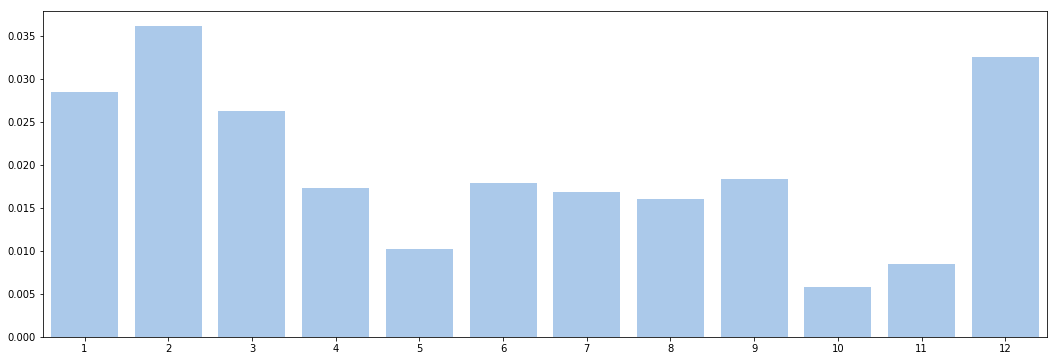

In [70]:
fig, ax = plt.subplots(figsize=(18,6))
values_cancel = dfcancel[dfcancel.cancelled].groupby('month').sum().cancelled.values
values_total = dfcancel.groupby('month').count().flightnum.values
labels = [x+1 for x in list(range(12))]
sns.set_color_codes('pastel')
sns.barplot(y=values_cancel/values_total,x=labels,ax=ax,label='Total',color='b');

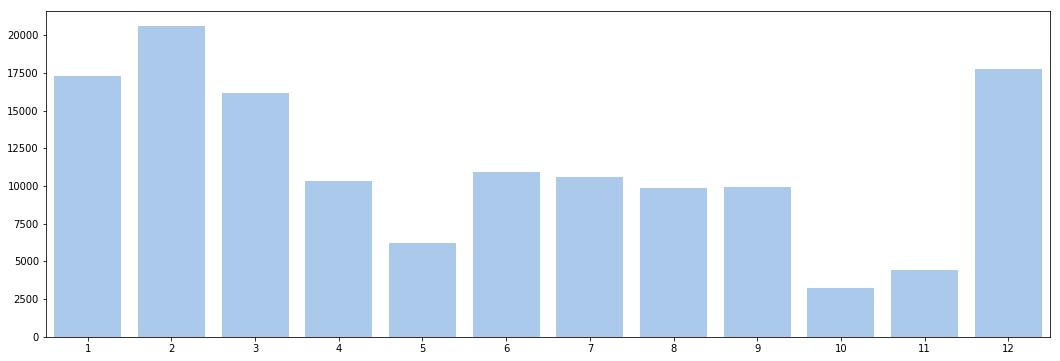

In [6]:
fig, ax = plt.subplots(figsize=(18,6))
values_cancel = dfcancel[dfcancel.cancelled].groupby('month').sum().cancelled.values
values_total = dfcancel.groupby('month').count().flightnum.values
labels = [x+1 for x in list(range(12))]
sns.set_color_codes('pastel')
sns.barplot(y=values_cancel,x=labels,ax=ax,label='Total',color='b');

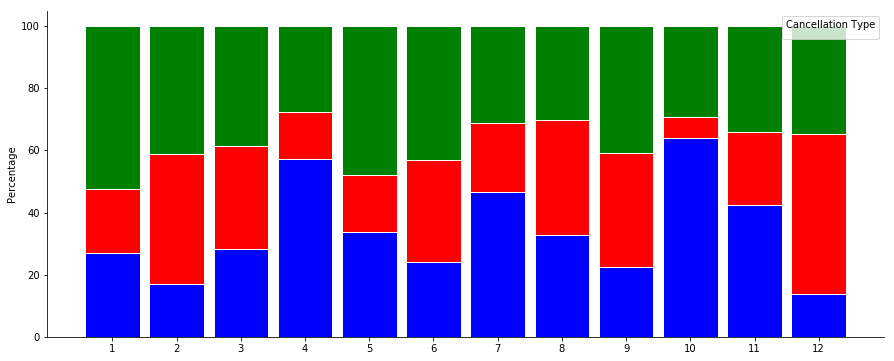

In [48]:
fig, ax = plt.subplots(figsize=(15,6))

df_temp = dfcancel[(dfcancel['origin'] == 'ORD') & (dfcancel.cancelled)]
totals  = df_temp.groupby(['month']).flightnum.count()
carrier_cancel = df_temp.groupby(['month','cancellationcode']).flightnum.count().values[::3]
carrier_cancel = [i/j*100 for i,j in zip(carrier_cancel,totals)]
weather_cancel = df_temp.groupby(['month','cancellationcode']).flightnum.count().values[1::3]
weather_cancel = [i/j*100 for i,j in zip(weather_cancel,totals)]
NAS_cancel = df_temp.groupby(['month','cancellationcode']).flightnum.count().values[2::3]
NAS_cancel = [i/j*100 for i,j in zip(NAS_cancel,totals)]

barwidith = 0.85
x = list(range(1,13))
plt.xticks(x)
plt.ylabel('Percentage')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(cancel_reason, title = 'Cancellation Type', loc = 'upper right')

plt.bar(x,carrier_cancel,color='blue',edgecolor='white', width = barwidith)
plt.bar(x,weather_cancel,bottom=carrier_cancel,color='red',edgecolor='white', width = barwidith)
plt.bar(x,NAS_cancel,bottom=[i+j for i,j in zip(carrier_cancel,weather_cancel)],color='green',edgecolor='white', width = barwidith);

### Cancellations per moment of day

In [29]:
dfcancel['hourofday'] = [x.hour for x in dfcancel.crsdeptime]
bins = [0,6,12,18,24]
labels = ['night','morning','afternoon','evening']
dfcancel['daystage'] = pd.cut(dfcancel.hourofday,bins,labels=labels)

In [37]:
dftemp =pd.DataFrame(dfcancel[dfcancel.cancelled].groupby('daystage').flightnum.count() / dfcancel.groupby('daystage').flightnum.count())

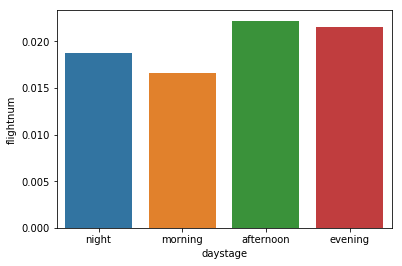

In [41]:
sns.barplot(data = dftemp, x=dftemp.index, y=dftemp.flightnum);

### Cancellations per day of week

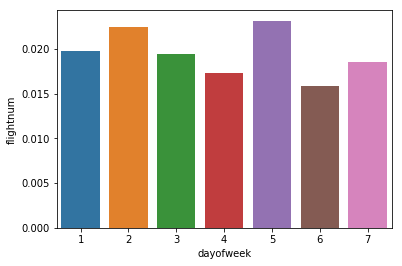

In [62]:
dftemp =pd.DataFrame(dfcancel[dfcancel.cancelled].groupby('dayofweek').flightnum.count() / dfcancel.groupby('dayofweek').flightnum.count())
sns.barplot(data = dftemp, x=dftemp.index, y=dftemp.flightnum);

## Delays

Objectives:
- percentage of delayed flights per carrier
- average delay per flight per carrier 
- facetgrid with histograms of the delay times per carrier 
- box plot with delay times per carrier 
- heatmap between carrier and month with delay times
- pairgrid beetween airtime,distance,delay
- heatmap between airports and months for weather delay
- scatterplots for dayofweek and hour of day

In [201]:
dfdelay = flights_df.copy()

In [202]:
dfdelay.drop(columns=['cancelled','cancellationcode','crsdeptime','crsarrtime'], inplace=True) 

In [203]:
dfdelay.head(3)

month  dayofmonth  dayofweek   deptime   arrtime uniquecarrier  flightnum  \
0      1           3          4  20:03:00  22:11:00            WN        335   
1      1           3          4  07:54:00  10:02:00            WN       3231   
2      1           3          4  06:28:00  08:04:00            WN        448   

   airtime  arrdelay  depdelay origin dest  distance  carrierdelay  \
0      116       -14         8    IAD  TPA       810             0   
1      113         2        19    IAD  TPA       810             0   
2       76        14         8    IND  BWI       515             0   

   weatherdelay  nasdelay  securitydelay  lateaircraftdelay   route  
0             0         0              0                  0  IADTPA  
1             0         0              0                  0  IADTPA  
2             0         0              0                  0  INDBWI

### Percentage of delayed flights per carrier

In [204]:
dfdelay.groupby('uniquecarrier').flightnum.count().sort_values(ascending=False) 

uniquecarrier
WN    1201754
AA     604885
OO     567159
MQ     490693
US     453589
DL     451931
UA     449515
XE     374510
NW     347652
CO     298455
EV     280575
9E     262208
FL     261684
YV     254930
OH     197607
B6     196091
AS     151102
F9      95762
HA      61826
AQ       7800
Name: flightnum, dtype: int64

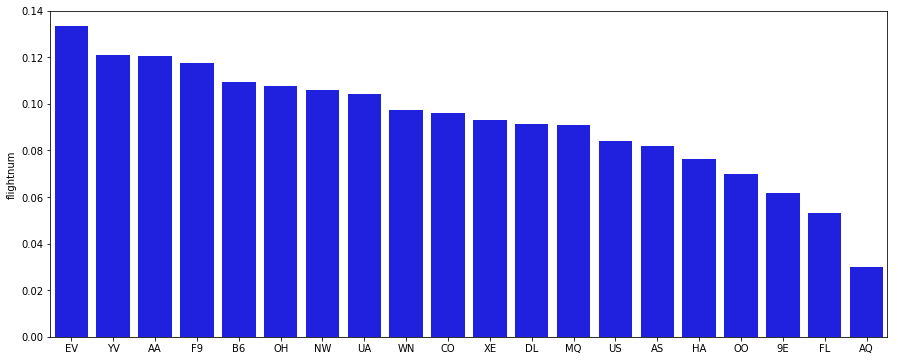

In [205]:
dftemp = pd.DataFrame(dfdelay[dfdelay.carrierdelay>0].groupby('uniquecarrier').flightnum.count() / dfdelay.groupby('uniquecarrier').flightnum.count())
dftemp.sort_values(by='flightnum',ascending = False, inplace=True)
fig, ax = plt.subplots(figsize=(15,6))
sns.barplot(x = list(dftemp.index), y = dftemp.flightnum, color = 'blue', ax = ax);

### Average Delay Per Carrier 

In [27]:
dfdelay.groupby('uniquecarrier').carrierdelay.mean().reset_index().sort_values(ascending=False,by='carrierdelay')

uniquecarrier  carrierdelay
19            YV      7.561841
7             EV      6.019670
13            OH      5.443967
1             AA      4.665196
12            NW      4.252088
15            UA      3.826680
11            MQ      3.475230
0             9E      3.464841
4             B6      3.455646
5             CO      3.337726
18            XE      3.252274
3             AS      3.188793
6             DL      3.122645
10            HA      2.989923
14            OO      2.958987
8             F9      2.620779
16            US      2.445683
17            WN      1.881418
9             FL      1.695587
2             AQ      1.118846

### Delay Distribution

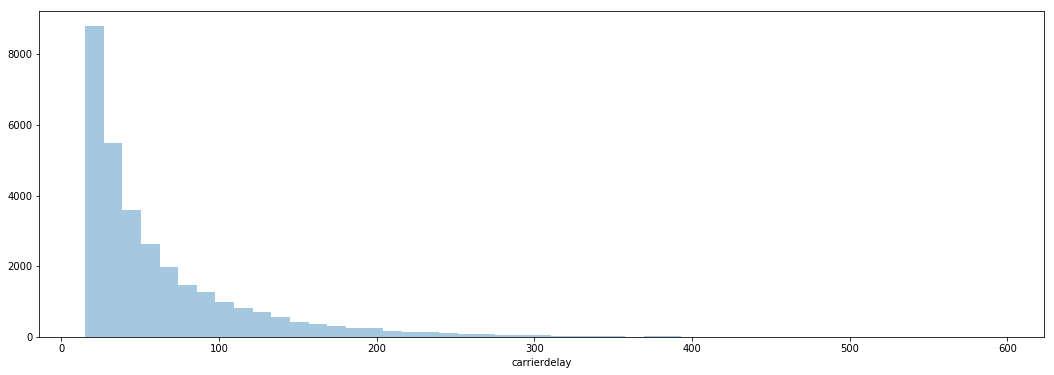

In [64]:
mindelay = dfdelay[(dfdelay.uniquecarrier == 'YV') & (dfdelay.carrierdelay!=0)].carrierdelay.min()
maxdelay = dfdelay[(dfdelay.uniquecarrier == 'YV') & (dfdelay.carrierdelay!=0)].carrierdelay.max()
steps = 50
bins = np.arange(mindelay,maxdelay,(maxdelay-mindelay)/steps)

fig, ax = plt.subplots(figsize=(18,6))
sns.distplot(dfdelay[(dfdelay.uniquecarrier == 'YV') & (dfdelay.carrierdelay!=0)].carrierdelay, kde=False, bins=bins, ax=ax);

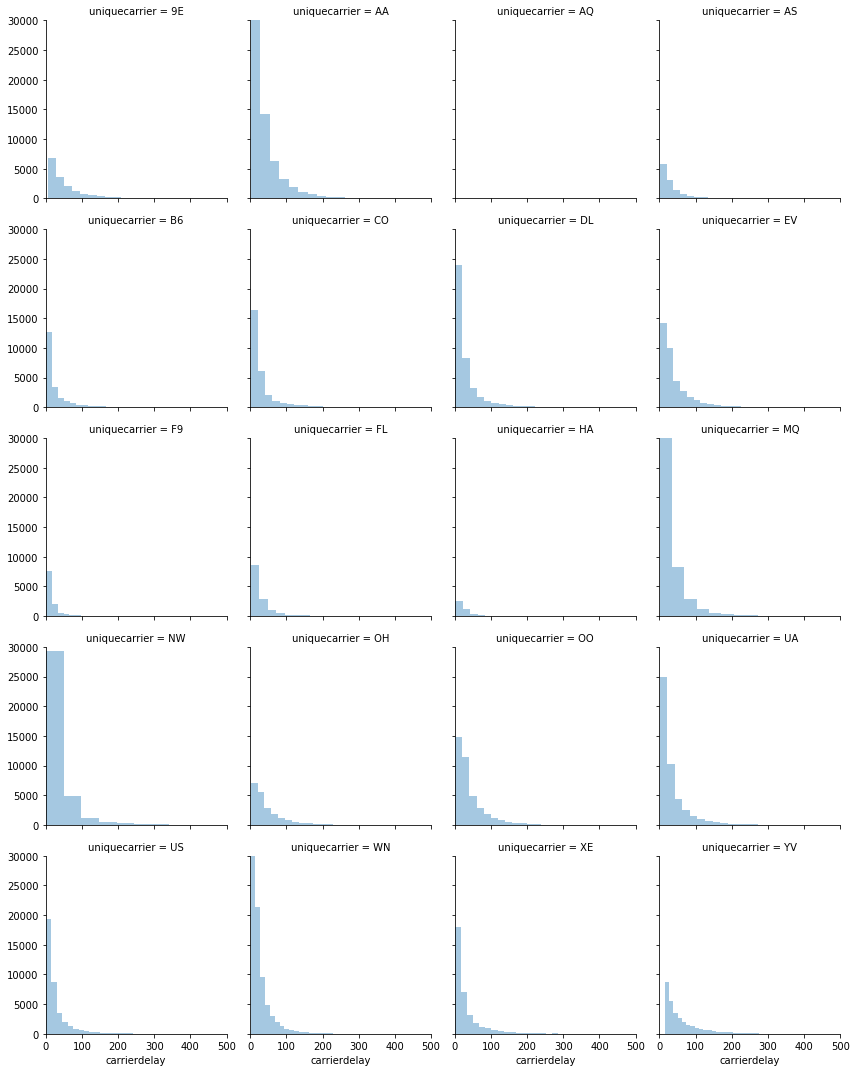

In [79]:
g = sns.FacetGrid(data = dfdelay[(dfdelay.carrierdelay!=0)], col = 'uniquecarrier', col_wrap = 4, height = 3,xlim=(0,500),ylim=(0,30000))
g.map(sns.distplot, 'carrierdelay', kde = False)

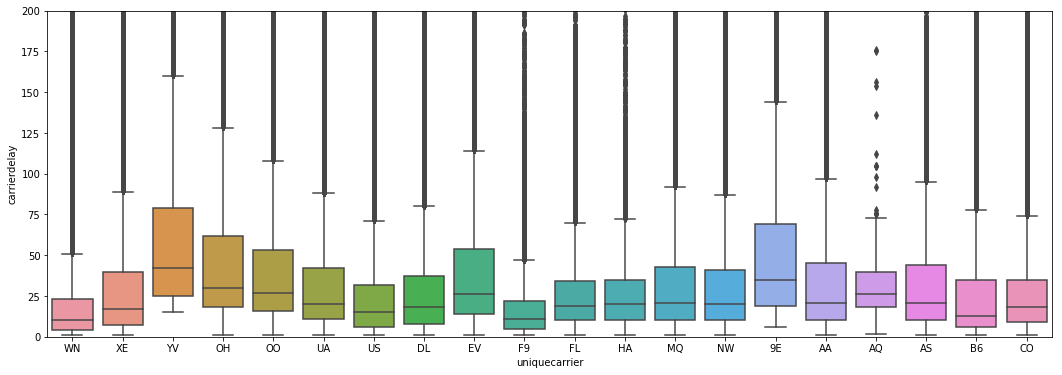

In [80]:
fig, ax = plt.subplots(figsize=(18,6))
ax.set_ylim([0,200])
sns.boxplot(data = dfdelay[(dfdelay.carrierdelay!=0)], y = 'carrierdelay', x = 'uniquecarrier', ax = ax);

### Heatmap between carrier and monthly delays

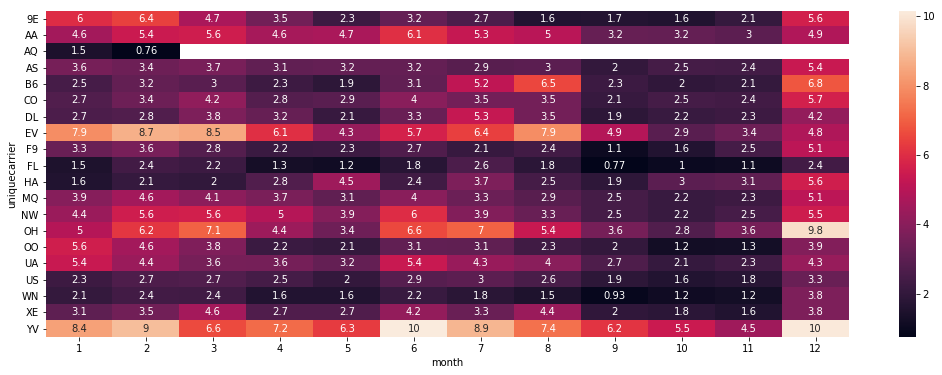

In [49]:
#Average delay per carrier/month
testdf = dfdelay.groupby(['uniquecarrier','month']).carrierdelay.mean().reset_index(name='carrierdelay')
testdf = testdf.pivot(index = 'uniquecarrier', columns = 'month', values = 'carrierdelay')
testdf

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(testdf, annot = True, ax = ax);

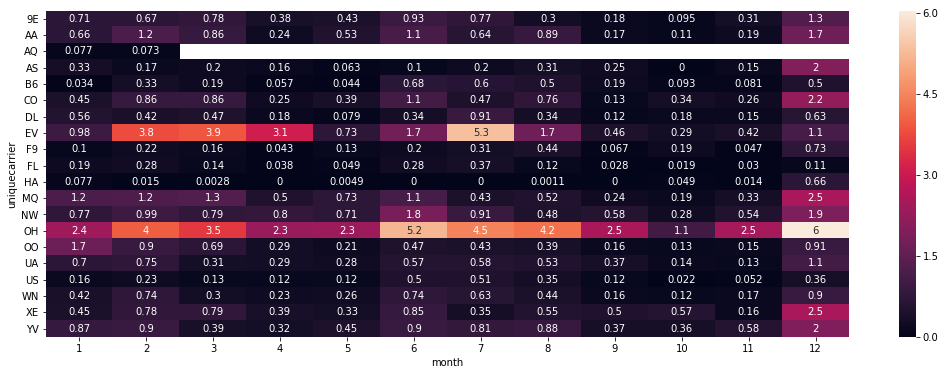

In [72]:
#Average weather delay per carrier month
testdf = dfdelay.groupby(['uniquecarrier','month']).weatherdelay.mean().reset_index(name='weatherdelay')
testdf = testdf.pivot(index = 'uniquecarrier', columns = 'month', values = 'weatherdelay')
testdf

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(testdf, annot = True, ax = ax);

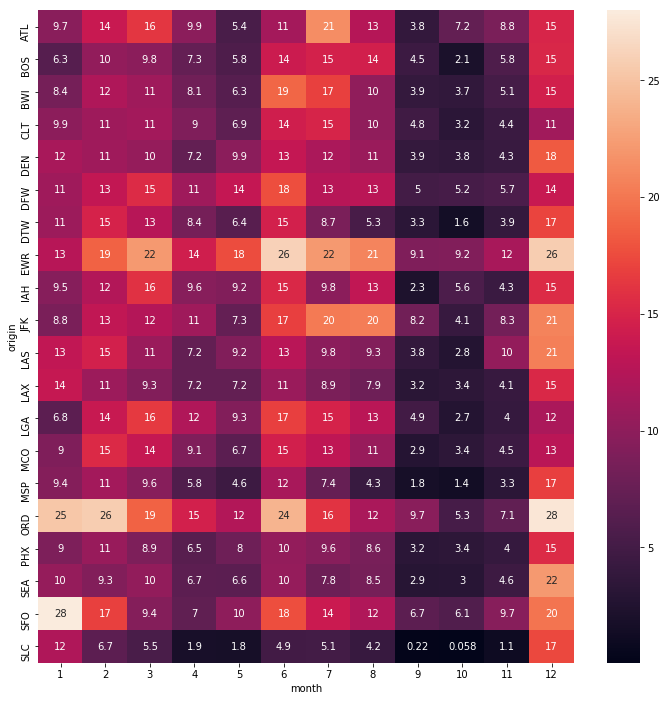

In [73]:
#Departure delay per airport/month
topairports = list(dfdelay.groupby('origin').flightnum.count().sort_values(ascending=False).head(20).index)

testdf = dfdelay[dfdelay.origin.isin(topairports)]

testdf = testdf.groupby(['origin','month']).depdelay.mean().reset_index(name='depdelay')
testdf = testdf.pivot(index = 'origin', columns = 'month', values = 'depdelay')

fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(testdf, annot = True, ax = ax);

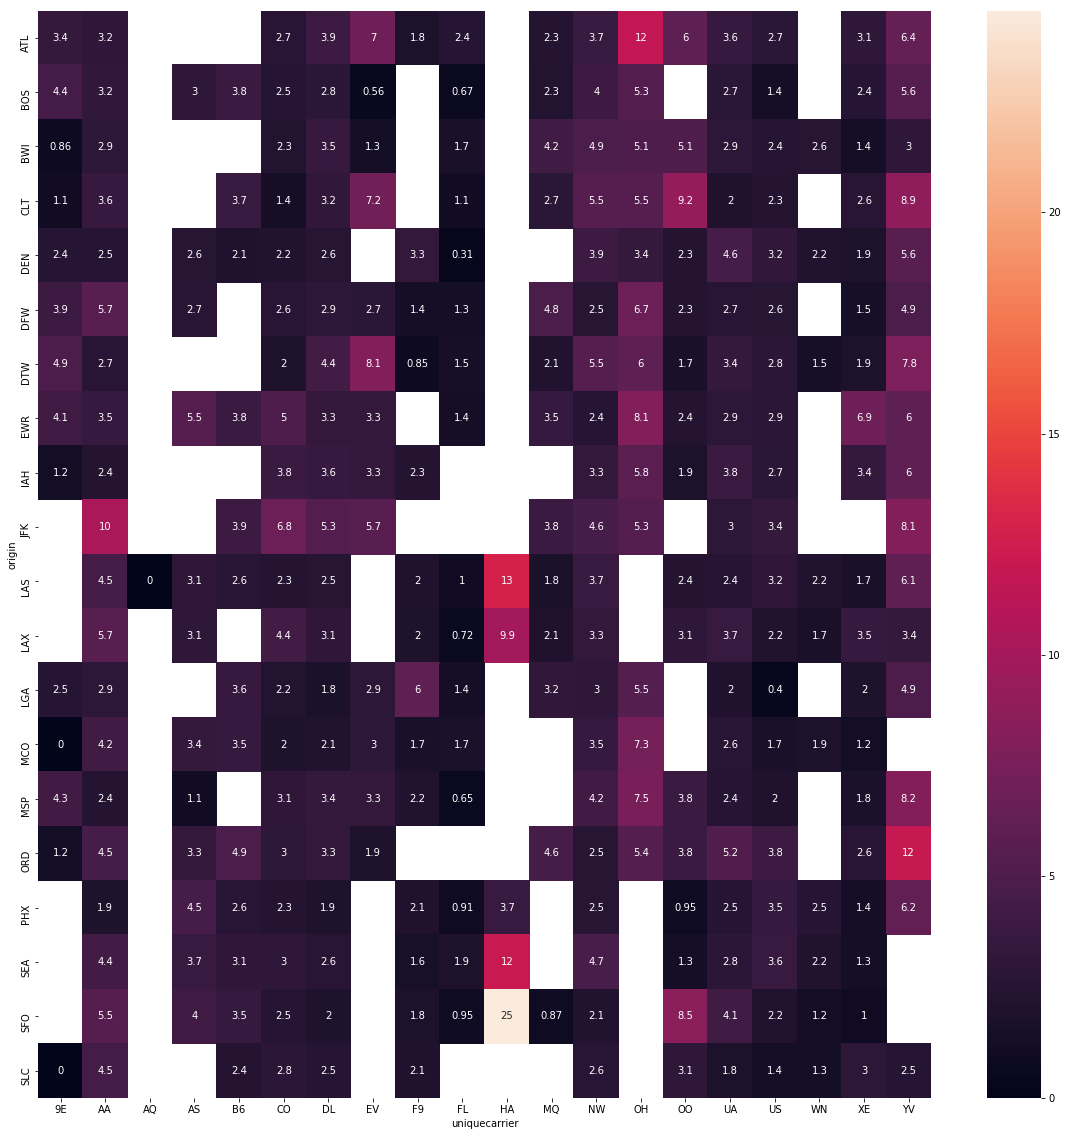

In [75]:
#Departure delay per airport/carrier
testdf = dfdelay[dfdelay.origin.isin(topairports)]

testdf = testdf.groupby(['origin','uniquecarrier']).carrierdelay.mean().reset_index(name='carrierdelay')
testdf = testdf.pivot(index = 'origin', columns = 'uniquecarrier', values = 'carrierdelay')

fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(testdf, annot = True, ax = ax);

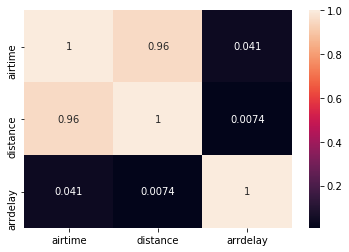

In [104]:
sns.heatmap(dfdelay[['airtime','distance','arrdelay']].corr(),annot = True);

In [84]:
dfdelay.head(3)

month  dayofmonth  dayofweek   deptime   arrtime uniquecarrier  flightnum  \
0      1           3          4  20:03:00  22:11:00            WN        335   
1      1           3          4  07:54:00  10:02:00            WN       3231   
2      1           3          4  06:28:00  08:04:00            WN        448   

   airtime  arrdelay  depdelay origin dest  distance  carrierdelay  \
0      116       -14         8    IAD  TPA       810             0   
1      113         2        19    IAD  TPA       810             0   
2       76        14         8    IND  BWI       515             0   

   weatherdelay  nasdelay  securitydelay  lateaircraftdelay  course  
0             0         0              0                  0  IADTPA  
1             0         0              0                  0  IADTPA  
2             0         0              0                  0  INDBWI

In [210]:
dfdelay['route'] = dfdelay.origin + dfdelay.dest

In [212]:
dfdelay.groupby('route').arrdelay.mean().sort_values(ascending = False).head(10)

route
CMISPI    575.0
BHMJFK    252.0
RICORF    227.0
ATWDSM    210.0
ORFBOI    180.0
ORFBDL    175.0
ROABWI    138.0
ORFPBI    135.0
IADDCA    135.0
INDPIT    130.0
Name: arrdelay, dtype: float64

In [216]:
dfdelay[dfdelay.route == 'ROABWI']

month  dayofmonth  dayofweek   deptime   arrtime uniquecarrier  \
2556291      5          31          6  17:10:00  18:38:00            OH   

         flightnum  airtime  arrdelay  depdelay origin dest  distance  \
2556291       5278       50       138        80    ROA  BWI       221   

         carrierdelay  weatherdelay  nasdelay  securitydelay  \
2556291             0             0       138              0   

         lateaircraftdelay   route  
2556291                  0  ROABWI

In [217]:
dfdelay.groupby('route').flightnum.count()

route
ABEATL     853
ABEBHM       1
ABECLE     805
ABECLT     465
ABECVG     247
ABEDTW     997
ABEJFK       3
ABELGA       9
ABEORD    1425
ABEPHL       2
ABIDFW    2660
ABQAMA     368
ABQATL    1067
ABQAUS     433
ABQBWI     546
ABQCLE      12
ABQCVG     260
ABQDAL    3078
ABQDEN    4318
ABQDFW    2888
ABQELP     799
ABQEWR     167
ABQHOU    1011
ABQIAD     365
ABQIAH    2261
ABQLAS    2402
ABQLAX    2395
ABQLBB     366
ABQMAF     367
ABQMCI     670
          ... 
XNACAK       1
XNACOS       1
XNACVG     101
XNADCA     209
XNADEN     685
XNADFW    2781
XNADTW     361
XNAEWR     545
XNAFAR       1
XNAIAH    1435
XNALAX     358
XNALEX       1
XNALGA     766
XNAMEM    1044
XNAMIA     154
XNAMSP     676
XNAORD    3114
XNARDU     104
XNARFD       1
XNASGF       1
XNASLC       4
YAKCDV     363
YAKJNU     362
YKMSLC     340
YUMGJT       1
YUMIPL     326
YUMLAS      99
YUMLAX    1044
YUMPHX    1961
YUMSLC     440
Name: flightnum, Length: 5366, dtype: int64

In [214]:
dfdelay.groupby('route').arrdelay.sum().sort_values(ascending = False).head(10)

route
ORDLGA    209318
ORDEWR    180997
LGAORD    179710
ATLLGA    171890
EWRORD    168650
LAXSFO    163913
ATLEWR    161095
EWRATL    151334
DFWORD    143287
CLTEWR    134268
Name: arrdelay, dtype: int32

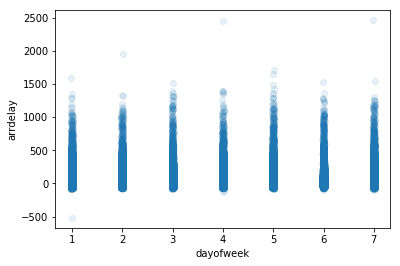

In [81]:
sns.regplot(data = dfdelay, x = 'dayofweek', y = 'arrdelay', fit_reg=False, x_jitter = 0.02, y_jitter = 0.02, scatter_kws = {'alpha' : 1/10});

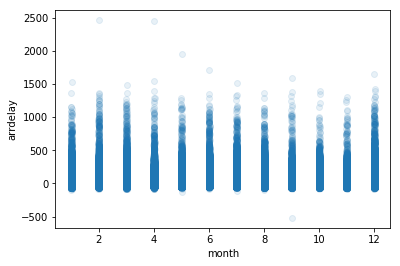

In [82]:
sns.regplot(data = dfdelay, x = 'month', y = 'arrdelay', fit_reg=False, x_jitter = 0.02, y_jitter = 0.02, scatter_kws = {'alpha' : 1/10});

## Explanatory Analysis

Barchart with cancellations per airline and per reason

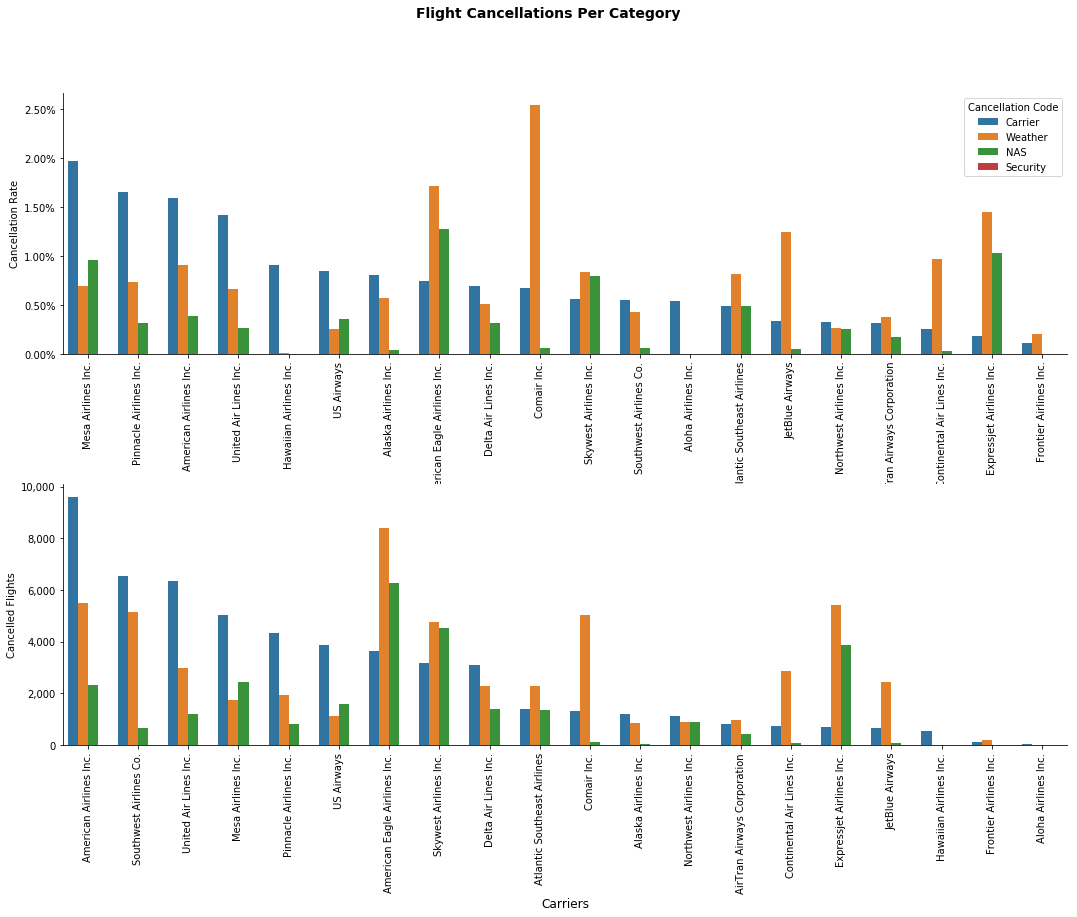

In [71]:
#Draw the barplot 
fig, (ax1,ax2) = plt.subplots(2,figsize=(18,12))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Flight Cancellations Per Category',va='top',fontweight='bold',fontsize='14')

#Chart 1 - Ratios

#determine the order in which the airlines will be displayed (cancellation rate descending)
carrier_order = df_cancel[df_cancel['cancellationcode']=='A'].groupby('uniquecarrier').cancelrate.sum().sort_values(ascending=False).index.values
#make the list of detailed names to use instead of abbreviations
x_labels = []
for carrier in carrier_order: 
    x_labels.append(carrier_dict[carrier])

#build the plot
sns.barplot(data = df_cancel, x = 'uniquecarrier', y = 'cancelrate', hue = 'cancellationcode', order = carrier_order, ax = ax1)
#adjust the axis labels and format
ax1.set_ylabel('Cancellation Rate')
ax1.set_xlabel('')
ax1.set_xticklabels(x_labels,rotation=90)
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: "{0:.2f}%".format(x)))
sns.despine(fig,ax=ax1)

#Chart 2 - Absolute Values

#determine the order in which the airlines will be displayed (cancelled no of flights descending)
carrier_order = df_cancel[df_cancel['cancellationcode']=='A'].groupby('uniquecarrier').cancelled.sum().sort_values(ascending=False).index.values
#make the list of detailed names to use instead of abbreviations
x_labels = []
for carrier in carrier_order: 
    x_labels.append(carrier_dict[carrier])

#build the plot
sns.barplot(data = df_cancel, x = 'uniquecarrier', y = 'cancelled', hue = 'cancellationcode', order = carrier_order, ax = ax2)
#adjust the axis labels and format
ax2.set_xlabel('Carriers', fontsize='12')
ax2.set_ylabel('Cancelled Flights')
ax2.set_xticklabels(x_labels,rotation=90)
ax2.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

#Legend
#getting the labels in order to bypass an issue where the legend elements are not displyed
h, l = ax1.get_legend_handles_labels()
ax1.legend(h, cancel_reason, title = 'Cancellation Code', loc = 'upper right');
ax2.get_legend().remove()

Airports with highest rate of cancellations

In [301]:
df_cancel_origin.lat.head(10).values

array([41.979595  , 32.89595056, 29.98047222, 33.64044444, 39.5       ,
       40.        , 40.5       , 42.3643475 , 39.85840806, 29.64541861])

In [306]:
df_cancel_origin.lat.head(10).values[4] = 39.5
df_cancel_origin.lat.head(10).values[4] = 39.5
df_cancel_origin.lat.head(10).values[5] = 40
df_cancel_origin.lat.head(10).values[6] = 40.5

''

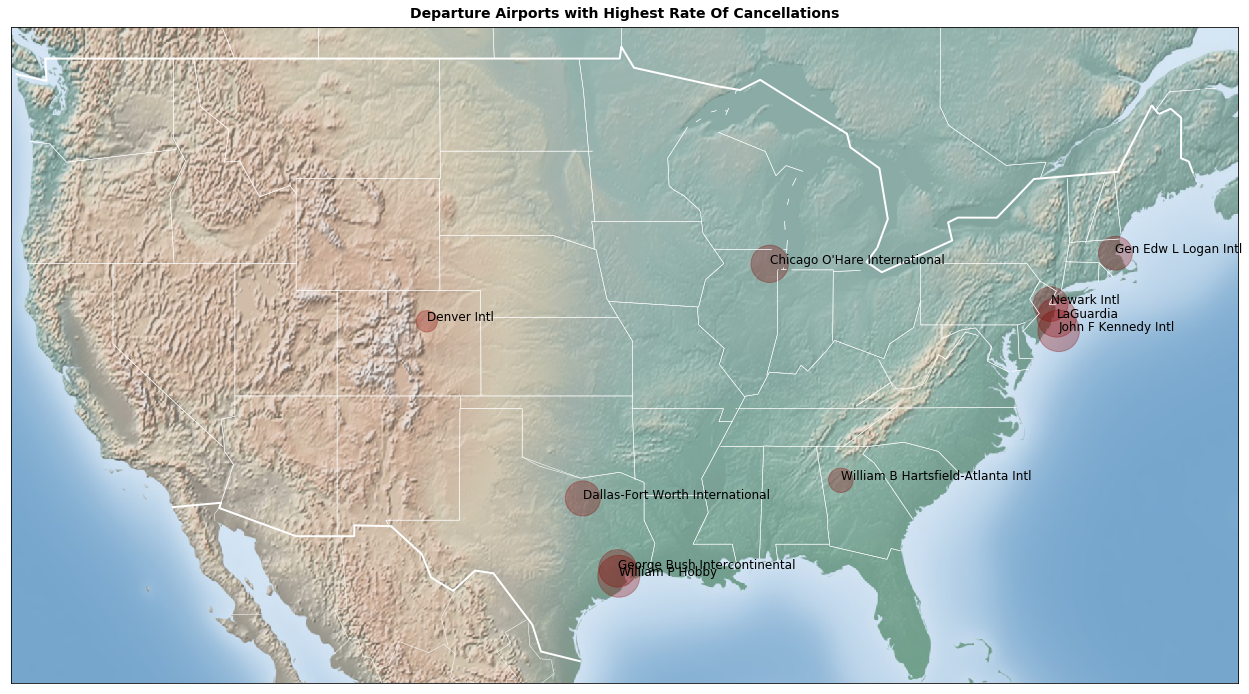

In [307]:
fig = plt.figure(figsize=(22, 18))
plt.title('Departure Airports with Highest Rate Of Cancellations',va='bottom',fontweight='bold',fontsize='14')
m = Basemap(resolution='c',projection='merc',llcrnrlon=-125,llcrnrlat=25,urcrnrlon=-65,urcrnrlat=50)
m.shadedrelief()
m.drawcountries(linewidth=2, linestyle='solid', color='white' ) 
m.drawstates(linewidth=0.5, linestyle='solid', color='white')

x,y = m(df_cancel_origin.long.head(10).values,df_cancel_origin.lat.head(10).values)
m.scatter(x,y,
         s = df_cancel_origin.cancelrate*1000,
         c='darkred',
         alpha = 0.3)
for x1,y1,airport in zip(x,y,df_cancel_origin.airport.head(10).values):
    plt.text(x1,y1,airport,color = 'black',size=12)
;

In [240]:
df_cancel_origin.head(2)

iata  cancellations   total  cancelrate                          airport  \
0  ORD         4896.0  350380    1.397340     Chicago O'Hare International   
1  DFW         3462.0  281281    1.230798  Dallas-Fort Worth International   

                city state country        lat       long  
0            Chicago    IL     USA  41.979595 -87.904464  
1  Dallas-Fort Worth    TX     USA  32.895951 -97.037200

Cancellation per year period and reason 

''

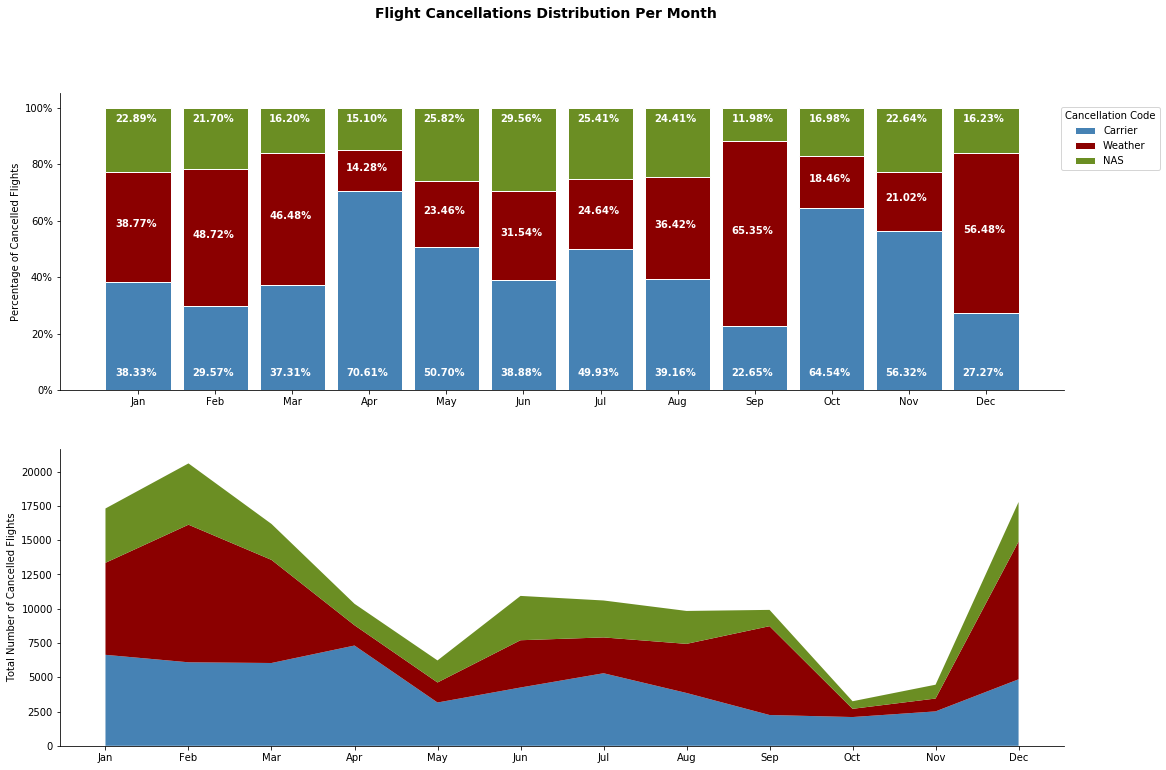

In [162]:
#build the figure and add a title to it 
fig, (ax1,ax2) = plt.subplots(2,figsize=(18,12))
fig.suptitle('Flight Cancellations Distribution Per Month',va='top',fontweight='bold',fontsize='14')

#create temp dataframe and aggregate
df_temp = dfcancel[(dfcancel.cancelled==1)&(dfcancel.cancellationcode!='D')]
totals  = df_temp.groupby(['month']).flightnum.count()

#split based on cancellation reason
carrier_cancel_values = df_temp.groupby(['month','cancellationcode']).flightnum.count().values[::3]
carrier_cancel_rates = [i/j*100 for i,j in zip(carrier_cancel_values,totals)]

weather_cancel_values = df_temp.groupby(['month','cancellationcode']).flightnum.count().values[1::3]
weather_cancel_rates = [i/j*100 for i,j in zip(weather_cancel_values,totals)]

NAS_cancel_values = df_temp.groupby(['month','cancellationcode']).flightnum.count().values[2::3]
NAS_cancel_rates = [i/j*100 for i,j in zip(NAS_cancel_values,totals)]

#setup for the visualisation
barwidith = 0.85
x = list(range(1,13))
x_labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
ax1.set_xticklabels(x_labels)
ax1.set_xticks(x)
ax1.set_ylabel('Percentage of Cancelled Flights')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.legend(cancel_reason, title = 'Cancellation Type', loc = 'upper right')
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: "{0:.0f}%".format(x)))

#build the actual barplots and add the numeric value there to help with the visualisation
ax1.bar(x,carrier_cancel_rates,color='steelblue',edgecolor='white', width = barwidith)
for i,v in enumerate(carrier_cancel_rates):
        ax1.text(i+0.70, 5, str(v)[:5]+'%', color='white',fontweight='bold')
ax1.bar(x,weather_cancel_rates,bottom=carrier_cancel_rates,color='darkred',edgecolor='white', width = barwidith)
for i,v in enumerate(weather_cancel_rates):
        ax1.text(i+0.70, carrier_cancel[i]+v/2, str(v)[:5]+'%', color='white',fontweight='bold')
ax1.bar(x,NAS_cancel_rates,bottom=[i+j for i,j in zip(carrier_cancel_rates,weather_cancel_rates)],color='olivedrab',edgecolor='white', width = barwidith)
for i,v in enumerate(NAS_cancel_rates):
        ax1.text(i+0.70, 95, str(v)[:5]+'%', color='white',fontweight='bold')

#Add legend and move it outside of the plot area so as not to overlap
ax1.legend(cancel_reason, title = 'Cancellation Code',bbox_to_anchor=(1.1, 0.97))

ax2.stackplot(x,[carrier_cancel_values,weather_cancel_values,NAS_cancel_values],colors=['steelblue','darkred','olivedrab'])
ax2.set_xticks(x)
ax2.set_xticklabels(x_labels)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.set_ylabel('Total Number of Cancelled Flights')
;

Delay percentage and delay average

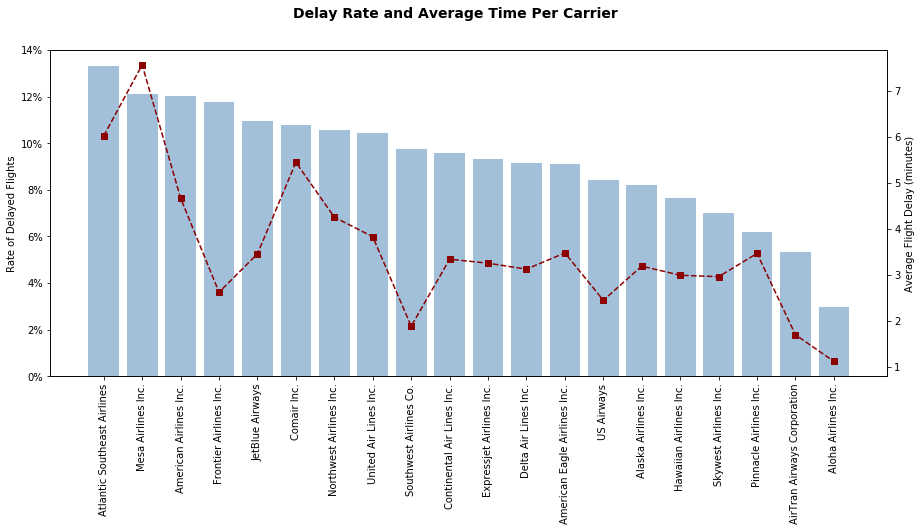

In [229]:
dftemp = pd.DataFrame(dfdelay[dfdelay.carrierdelay>0].groupby('uniquecarrier').flightnum.count() / dfdelay.groupby('uniquecarrier').flightnum.count())
dftemp.sort_values(by='flightnum',ascending = False, inplace=True)
dftemp = dftemp.reset_index()
dftemp['average_delay'] = [dfdelay[dfdelay.uniquecarrier == x].carrierdelay.mean() for x in dftemp.uniquecarrier]
fig, ax1 = plt.subplots(figsize=(15,6))
fig.suptitle('Delay Rate and Average Time Per Carrier',va='top',fontweight='bold',fontsize='14')
plt.bar(dftemp.uniquecarrier, height = dftemp.flightnum, color = 'steelblue',alpha=0.5)
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: "{0:.0f}%".format(x*100)))
ax1.set_ylabel('Rate of Delayed Flights')
x_labels = []
for carrier in dftemp.uniquecarrier: 
    x_labels.append(carrier_dict[carrier])
ax1.set_xticklabels(x_labels,rotation=90)
ax2 = plt.twinx()
ax2.plot(range(0,20),dftemp.average_delay,linestyle='--',color='darkred',marker='s')
ax2.set_ylabel('Average Flight Delay (minutes)');

Boxplot without outliers

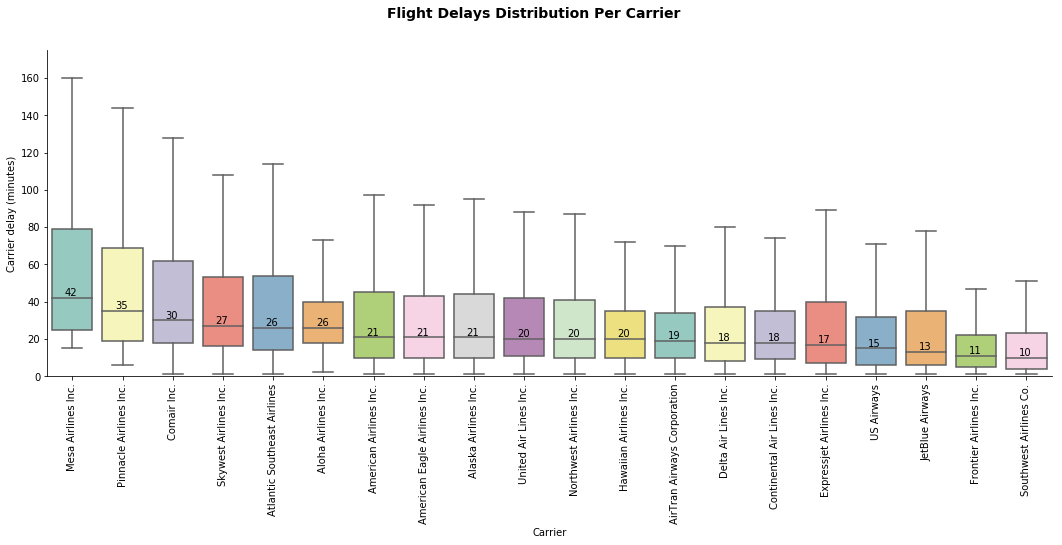

In [76]:
# determine carrier order based on the median value of the delays
carrier_order = dfdelay[dfdelay.carrierdelay != 0].groupby('uniquecarrier').carrierdelay.median().sort_values(ascending=False).index.tolist()
medians = dfdelay[dfdelay.carrierdelay != 0].groupby('uniquecarrier').carrierdelay.median().reindex(carrier_order).values

#create the figure
fig, ax = plt.subplots(figsize=(18,6))
fig.suptitle('Flight Delays Distribution Per Carrier',va='top',fontweight='bold',fontsize='14')
#set an upper limit due to the high numbers of outliers
ax.set_ylim([0,175])

#generate the boxplots, leave the outliers out
sns.boxplot(data = dfdelay[(dfdelay.carrierdelay!=0)], y = 'carrierdelay', x = 'uniquecarrier', ax = ax,showfliers=False,order=carrier_order,palette='Set3')

#adjust axis and show the values on the graph
ax.set(ylabel='Carrier delay (minutes)')
ax.set(xlabel='Carrier')
x_labels=[]
for carrier in carrier_order: 
    x_labels.append(carrier_dict[carrier])
ax.set_xticklabels(x_labels,rotation=90)
ax.spines['top'].set_visible(False)
for i,v in enumerate(medians):
        ax.text(i-0.15, v+1, str(v)[:2], color='black')
ax.spines['right'].set_visible(False);

Heatmap with carrier and month

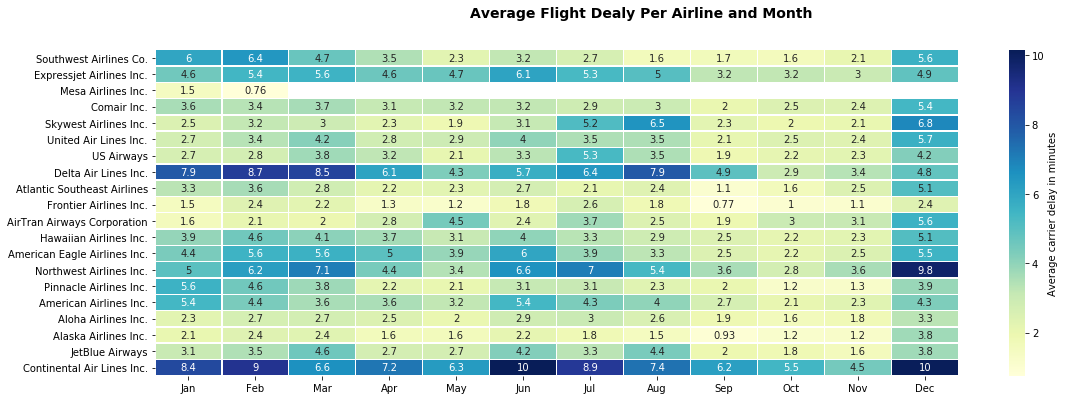

In [95]:
#Average delay per carrier/month
testdf = dfdelay.groupby(['uniquecarrier','month']).carrierdelay.mean().reset_index(name='carrierdelay')
testdf = testdf.pivot(index = 'uniquecarrier', columns = 'month', values = 'carrierdelay')
testdf

fig, ax = plt.subplots(figsize=(18,6))
fig.suptitle('Average Flight Dealy Per Airline and Month',va='top',fontweight='bold',fontsize='14')
sns.heatmap(testdf, annot = True, ax = ax,cmap="YlGnBu",linewidths=.5, linecolor='white',cbar_kws={'label': 'Average carrier delay in minutes'})
ax.set(ylabel='')
ax.set(xlabel='')
x_labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
ax.set_xticklabels(x_labels)
y_labels = []
for carrier in dfdelay.uniquecarrier.unique(): 
    y_labels.append(carrier_dict[carrier])
ax.set_yticklabels(y_labels);


Heatmap with airpoirt nad month

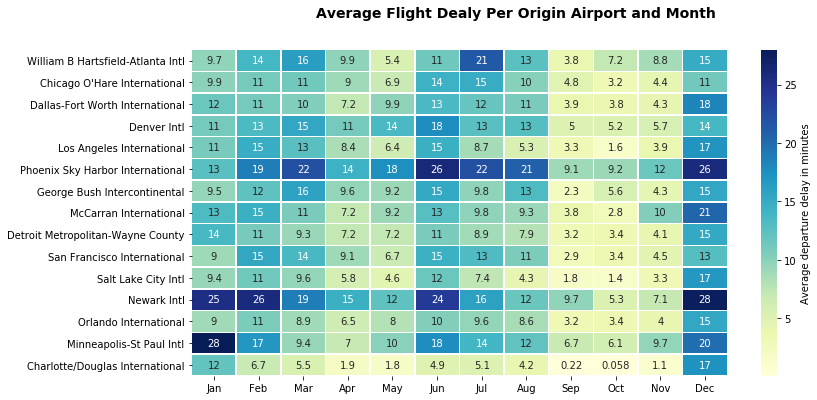

In [120]:
#Departure delay per airport/month
topairports = list(dfdelay.groupby('origin').flightnum.count().sort_values(ascending=False).head(15).index)

testdf = dfdelay[dfdelay.origin.isin(topairports)]

testdf = testdf.groupby(['origin','month']).depdelay.mean().reset_index(name='depdelay')
testdf = testdf.pivot(index = 'origin', columns = 'month', values = 'depdelay')

fig, ax = plt.subplots(figsize=(12,6))
fig.suptitle('Average Flight Dealy Per Origin Airport and Month',va='top',fontweight='bold',fontsize='14')
sns.heatmap(testdf, annot = True, ax = ax,cmap="YlGnBu",linewidths=.5, linecolor='white',cbar_kws={'label': 'Average departure delay in minutes'})
ax.set(ylabel='')
ax.set(xlabel='')
x_labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
ax.set_xticklabels(x_labels)
y_labels = []
for airport in topairports: 
    y_labels.append(airport_dict[airport])
ax.set_yticklabels(y_labels);

Barchart and linechart for weather cancellation pe month

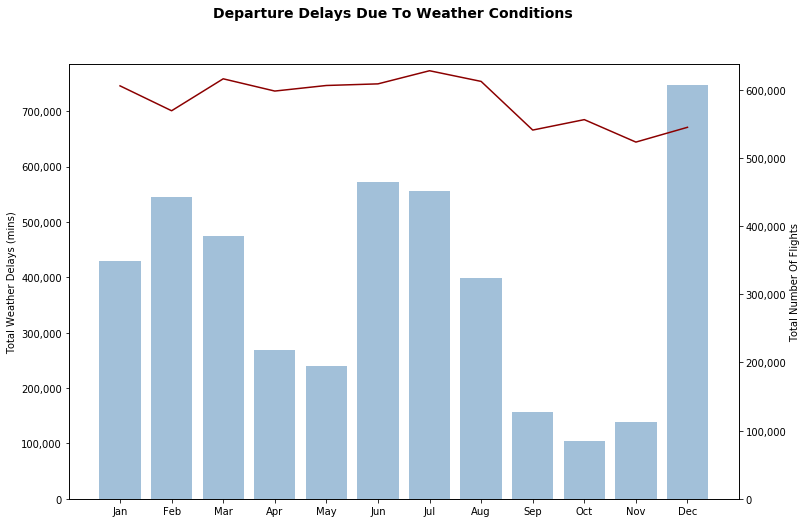

In [205]:
fig, ax1 = plt.subplots(figsize=(12,8))
fig.suptitle('Departure Delays Due To Weather Conditions',va='top',fontweight='bold',fontsize='14')
x = list(range(1,13))
plt.bar(x,dfdelay.groupby('month').weatherdelay.sum().values, color = 'steelblue', alpha = 0.5)
plt.ylabel('Total Weather Delays (mins)')
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.set_xticks(x)
x_labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
ax1.set_xticklabels(x_labels)

ax2 = plt.twinx()
ax2.set_ylim(0,df.groupby('month').flightnum.count().values.max()+10000)
ax2.plot(x,df.groupby('month').flightnum.count().values, color = 'darkred')
ax2.set_ylabel('Total Number Of Flights')
ax2.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')));

Route with highest delay/cancellation (barchart)

In [121]:
#create a dataframe for all routes with more than 100 flights
#we want to check regular routes not one offs 
dftemp = pd.DataFrame(df.groupby('route').flightnum.count().sort_values(ascending=False))
dftemp = dftemp[dftemp.flightnum > 100]
dftemp = df[df.route.isin(dftemp.index)]
dftemp.head(3)

month  dayofmonth  dayofweek   deptime crsdeptime   arrtime crsarrtime  \
0      1           3          4  20:03:00   19:55:00  22:11:00   22:25:00   
1      1           3          4  07:54:00   07:35:00  10:02:00   10:00:00   
2      1           3          4  06:28:00   06:20:00  08:04:00   07:50:00   

  uniquecarrier  flightnum  airtime  ...  dest  distance cancelled  \
0            WN        335      116  ...   TPA       810     False   
1            WN       3231      113  ...   TPA       810     False   
2            WN        448       76  ...   BWI       515     False   

  cancellationcode  carrierdelay  weatherdelay nasdelay  securitydelay  \
0              NaN             0             0        0              0   
1              NaN             0             0        0              0   
2              NaN             0             0        0              0   

   lateaircraftdelay   route  
0                  0  IADTPA  
1                  0  IADTPA  
2                  0  INDBWI  

[3 rows x 23 columns]

In [122]:
cancel_routes = pd.DataFrame(dftemp.groupby('route').cancelled.mean().sort_values(ascending=False).head(15)).reset_index()
delay_routes = pd.DataFrame(dftemp[dftemp.arrdelay!=0].groupby('route').arrdelay.mean().sort_values(ascending=False).head(15)).reset_index()

In [123]:
cancel_routes['origin'] = [str(x)[:3] for x in cancel_routes.route]
cancel_routes['dest'] = [str(x)[3:] for x in cancel_routes.route]
cancel_routes['origin_name'] = [airport_dict[airport] for airport in cancel_routes.origin]
cancel_routes['dest_name'] = [airport_dict[airport] for airport in cancel_routes.dest]
cancel_routes['origin_lat'] = [airports_df[airports_df.iata == x].lat.values[0] for x in cancel_routes.origin]
cancel_routes['origin_long'] = [airports_df[airports_df.iata == x].long.values[0] for x in cancel_routes.origin]
cancel_routes['dest_lat'] = [airports_df[airports_df.iata == x].lat.values[0] for x in cancel_routes.dest]
cancel_routes['dest_long'] = [airports_df[airports_df.iata == x].long.values[0] for x in cancel_routes.dest]

cancel_routes.head(3)

route  cancelled origin dest                       origin_name  \
0  ASEPHX   0.229358    ASE  PHX            Aspen-Pitkin Co/Sardy    
1  TEXPHX   0.211340    TEX  PHX                Telluride Regional   
2  PHXTEX   0.180412    PHX  TEX  Phoenix Sky Harbor International   

                          dest_name  origin_lat  origin_long   dest_lat  \
0  Phoenix Sky Harbor International   39.223160  -106.868845  33.434167   
1  Phoenix Sky Harbor International   37.953759  -107.908480  33.434167   
2                Telluride Regional   33.434167  -112.008056  37.953759   

    dest_long  
0 -112.008056  
1 -112.008056  
2 -107.908480

In [140]:
delay_routes['origin'] = [str(x)[:3] for x in delay_routes.route]
delay_routes['dest'] = [str(x)[3:] for x in delay_routes.route]
delay_routes['origin_name'] = [airport_dict[airport] for airport in delay_routes.origin]
delay_routes['dest_name'] = [airport_dict[airport] for airport in delay_routes.dest]
delay_routes['origin_lat'] = [airports_df[airports_df.iata == x].lat.values[0] for x in delay_routes.origin]
delay_routes['origin_long'] = [airports_df[airports_df.iata == x].long.values[0] for x in delay_routes.origin]
delay_routes['dest_lat'] = [airports_df[airports_df.iata == x].lat.values[0] for x in delay_routes.dest]
delay_routes['dest_long'] = [airports_df[airports_df.iata == x].long.values[0] for x in delay_routes.dest]

delay_routes.head(3)

route   arrdelay origin dest      origin_name  \
0  GUCDFW  62.702970    GUC  DFW  Gunnison County   
1  HDNORD  55.984211    HDN  ORD     Yampa Valley   
2  EWRABQ  53.333333    EWR  ABQ      Newark Intl   

                         dest_name  origin_lat  origin_long   dest_lat  \
0  Dallas-Fort Worth International   38.533963  -106.933182  32.895951   
1     Chicago O'Hare International   40.481180  -107.217660  41.979595   
2        Albuquerque International   40.692497   -74.168661  35.040222   

    dest_long  
0  -97.037200  
1  -87.904464  
2 -106.609194

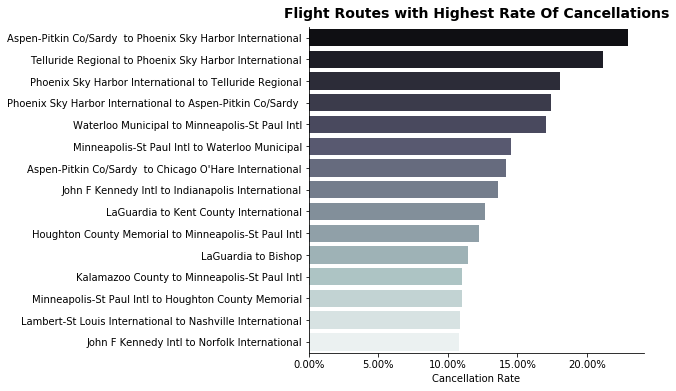

In [192]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.title('Flight Routes with Highest Rate Of Cancellations',va='bottom',fontweight='bold',fontsize='14')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
labels = cancel_routes.origin_name+' to '+cancel_routes.dest_name
sns.barplot(y=cancel_routes.route, x = cancel_routes.cancelled, palette = 'bone', ci=None)
ax.set_yticklabels(labels)
ax.set_ylabel('')
ax.set_xlabel('Cancellation Rate')
ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: "{0:.2f}%".format(x*100)));

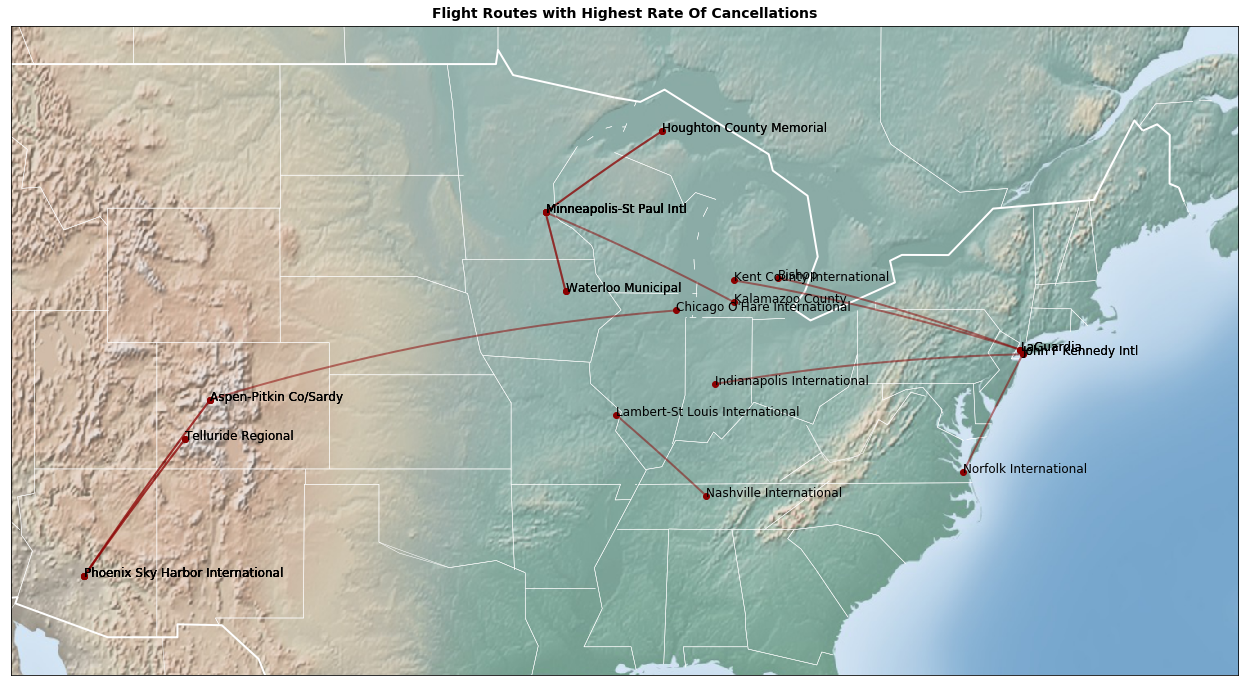

In [149]:
fig = plt.figure(figsize=(22, 18))
plt.title('Flight Routes with Highest Rate Of Cancellations',va='bottom',fontweight='bold',fontsize='14')
m = Basemap(resolution='c',projection='merc',llcrnrlon=-115,llcrnrlat=30,urcrnrlon=-65,urcrnrlat=50)
m.shadedrelief()
m.drawcountries(linewidth=2, linestyle='solid', color='white' ) 
m.drawstates(linewidth=0.5, linestyle='solid', color='white')

for startlon,startlat,arrlon,arrlat,origin_name,dest_name in zip(cancel_routes.origin_long,cancel_routes.origin_lat,
                                                                 cancel_routes.dest_long,cancel_routes.dest_lat,
                                                                 cancel_routes.origin_name,cancel_routes.dest_name):
    m.drawgreatcircle(startlon,startlat,arrlon,arrlat, linewidth=2, color='darkred',alpha=0.5)
    x1,y1=m(startlon,startlat)
    m.plot(x1,y1,'o',color = 'darkred')
    x2,y2=m(arrlon,arrlat)
    m.plot(x2,y2,'o',color = 'darkred')
    plt.text(x1,y1,origin_name,color = 'black',size=12)
    plt.text(x2,y2,dest_name,color = 'black',size=12)


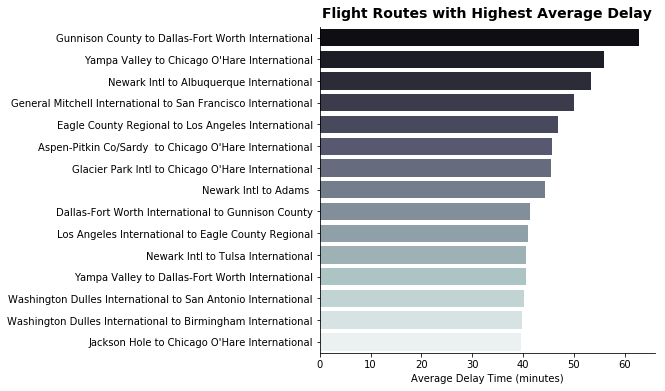

In [195]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.title('Flight Routes with Highest Average Delay',va='bottom',fontweight='bold',fontsize='14')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
labels = delay_routes.origin_name+' to '+delay_routes.dest_name
sns.barplot(y=delay_routes.route, x = delay_routes.arrdelay, palette = 'bone', ci=None)
ax.set_yticklabels(labels)
ax.set_ylabel('')
ax.set_xlabel('Average Delay Time (minutes)')
ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: "{0:.0f}".format(x)));

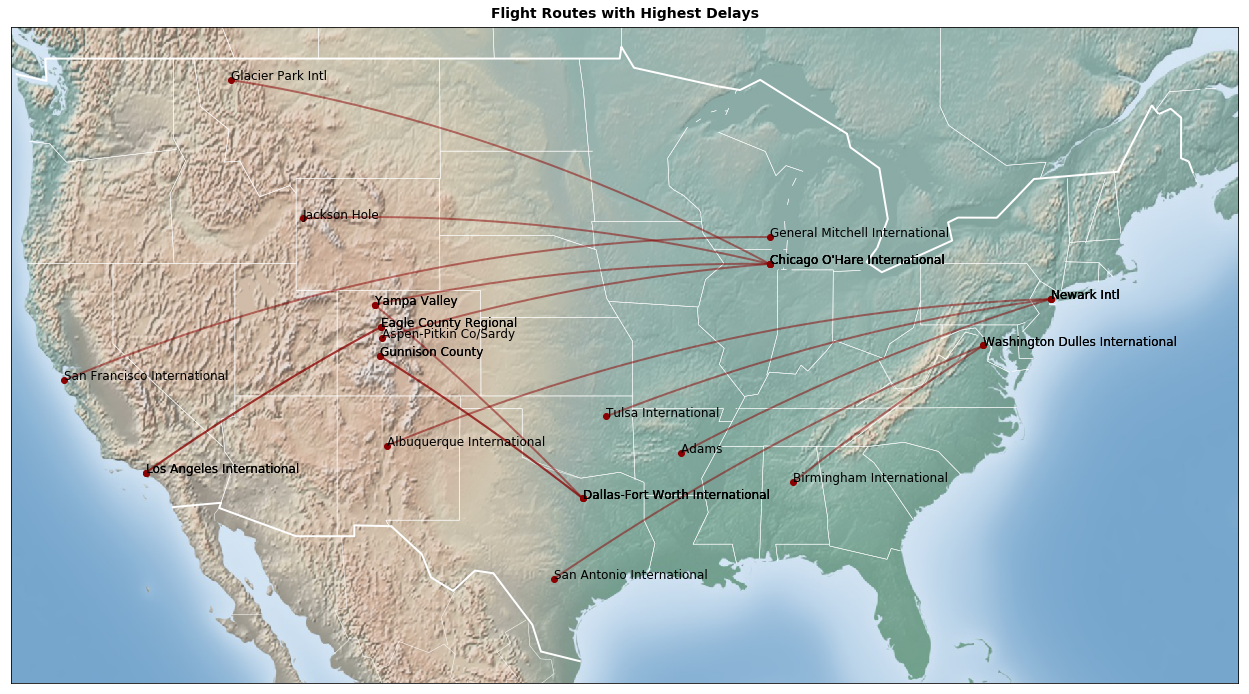

In [150]:
plt.figure(figsize=(22, 18))
plt.title('Flight Routes with Highest Delays',va='bottom',fontweight='bold',fontsize='14')
m = Basemap(resolution='c',projection='merc',llcrnrlon=-125,llcrnrlat=25,urcrnrlon=-65,urcrnrlat=50)
m.shadedrelief()
m.drawcountries(linewidth=2, linestyle='solid', color='white' ) 
m.drawstates(linewidth=0.5, linestyle='solid', color='white')

for startlon,startlat,arrlon,arrlat,origin_name,dest_name in zip(delay_routes.origin_long,delay_routes.origin_lat,
                                                                 delay_routes.dest_long,delay_routes.dest_lat,
                                                                 delay_routes.origin_name,delay_routes.dest_name):
    m.drawgreatcircle(startlon,startlat,arrlon,arrlat, linewidth=2, color='darkred',alpha=0.5)
    x1,y1=m(startlon,startlat)
    m.plot(x1,y1,'o',color = 'darkred')
    x2,y2=m(arrlon,arrlat)
    m.plot(x2,y2,'o',color = 'darkred')
    plt.text(x1,y1,origin_name,color = 'black',size=12)
    plt.text(x2,y2,dest_name,color = 'black',size=12)